# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:58:18.707495: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:58:22.850726
2025-04-15 00:58:22.850726


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:58:15"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

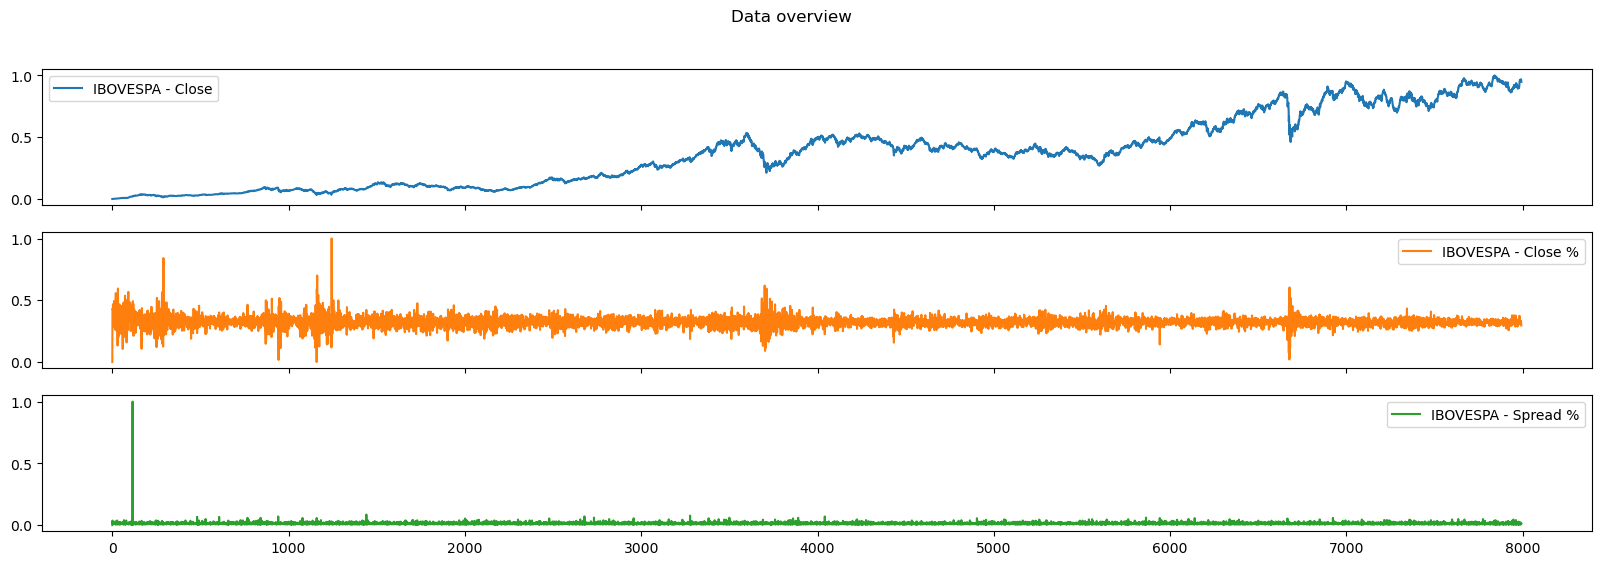

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

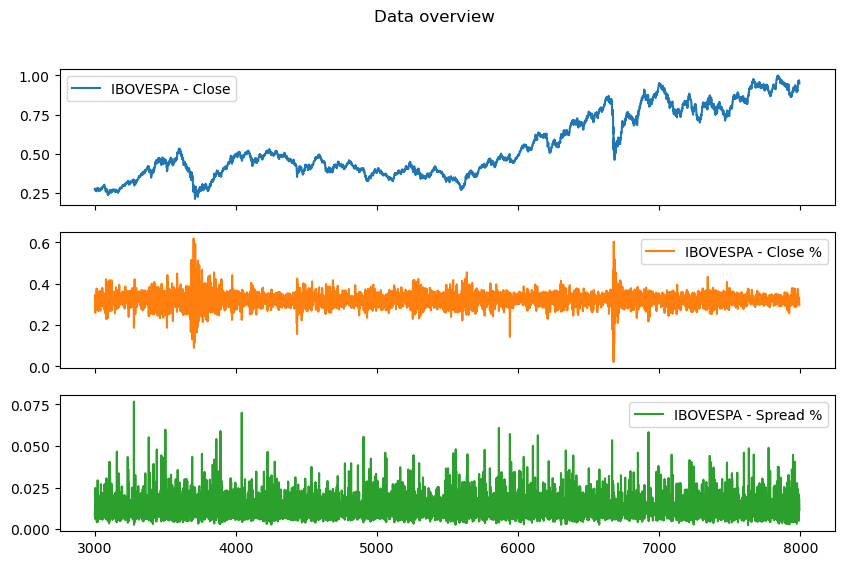

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

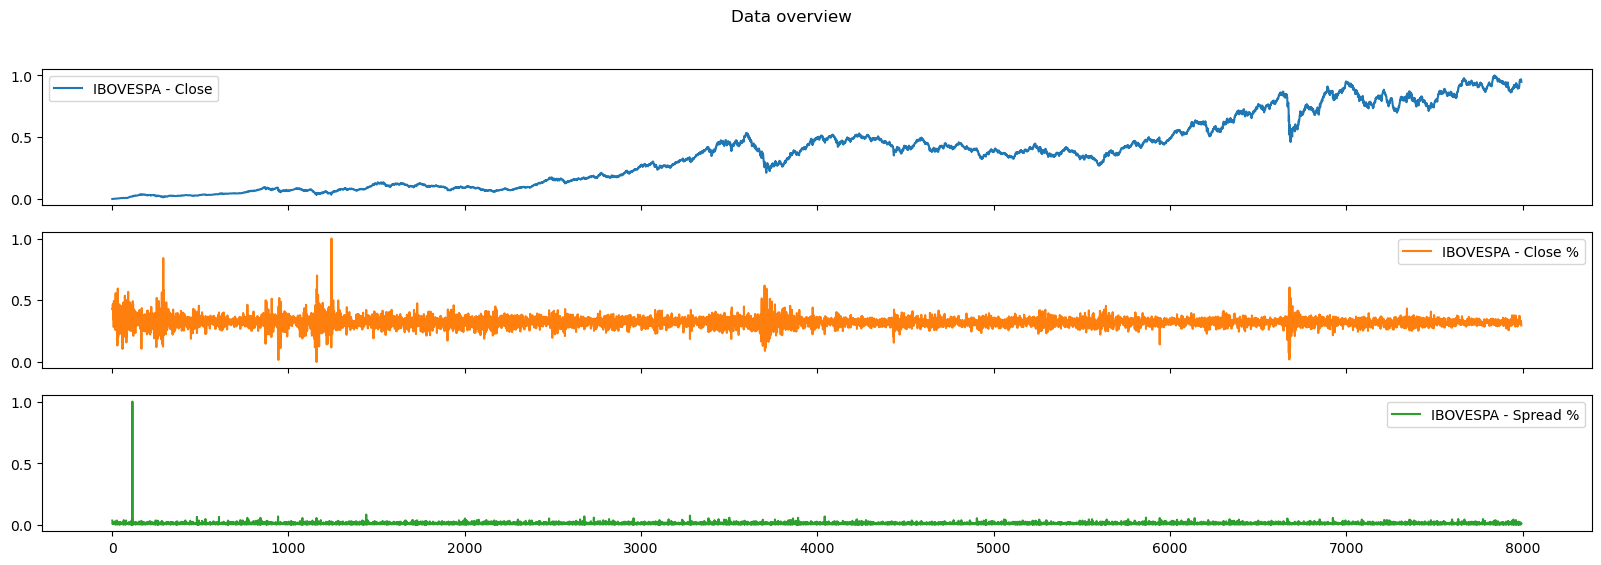

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

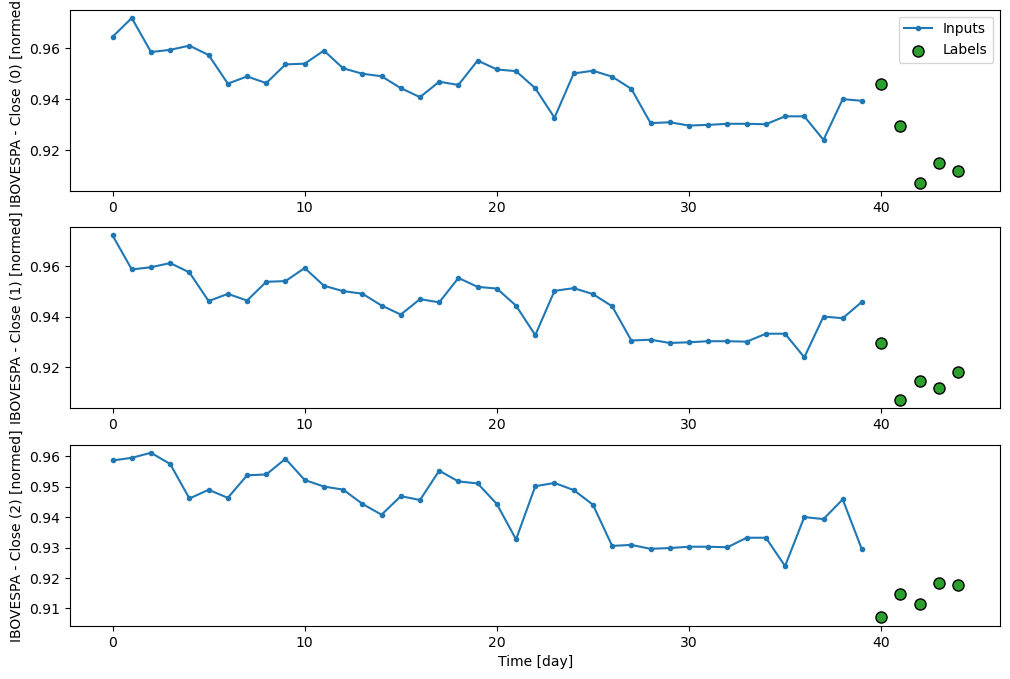

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18:51 5s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 92.0631 - mean_squared_error: 9.8302e-05 - root_mean_squared_error: 0.0096  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 84.1334 - mean_squared_error: 1.3800e-04 - root_mean_squared_error: 0.0114

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 83.8876 - mean_squared_error: 2.7610e-04 - root_mean_squared_error: 0.0153

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 82.5651 - mean_squared_error: 3.3237e-04 - root_mean_squared_error: 0.0170

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.7327 - mean_squared_error: 3.5086e-04 - root_mean_squared_error: 0.0177

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 76.4259 - mean_squared_error: 3.5339e-04 - root_mean_squared_error: 0.0179

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 73.2990 - mean_squared_error: 3.4917e-04 - root_mean_squared_error: 0.0179

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 70.4444 - mean_squared_error: 3.4210e-04 - root_mean_squared_error: 0.0178

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 67.7908 - mean_squared_error: 3.3366e-04 - root_mean_squared_error: 0.0176

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 65.3633 - mean_squared_error: 3.2490e-04 - root_mean_squared_error: 0.0174

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 63.1514 - mean_squared_error: 3.1633e-04 - root_mean_squared_error: 0.0172

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 61.1991 - mean_squared_error: 3.0979e-04 - root_mean_squared_error: 0.0171

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.4995 - mean_squared_error: 3.0729e-04 - root_mean_squared_error: 0.0170

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.9480 - mean_squared_error: 3.0529e-04 - root_mean_squared_error: 0.0170

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.6062 - mean_squared_error: 3.0552e-04 - root_mean_squared_error: 0.0170

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.3419 - mean_squared_error: 3.0525e-04 - root_mean_squared_error: 0.0171

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.1423 - mean_squared_error: 3.0429e-04 - root_mean_squared_error: 0.0171

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.0421 - mean_squared_error: 3.0311e-04 - root_mean_squared_error: 0.0170

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 52.5290 - mean_squared_error: 3.0254e-04 - root_mean_squared_error: 0.0170

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 51.5746 - mean_squared_error: 3.0193e-04 - root_mean_squared_error: 0.0170

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 51.1199 - mean_squared_error: 3.0165e-04 - root_mean_squared_error: 0.0170

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 50.2359 - mean_squared_error: 3.0077e-04 - root_mean_squared_error: 0.0170

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 49.3913 - mean_squared_error: 2.9983e-04 - root_mean_squared_error: 0.0170

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 48.6182 - mean_squared_error: 3.0126e-04 - root_mean_squared_error: 0.0171

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 47.8820 - mean_squared_error: 3.0295e-04 - root_mean_squared_error: 0.0171

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 47.1731 - mean_squared_error: 3.0429e-04 - root_mean_squared_error: 0.0172

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 46.5011 - mean_squared_error: 3.0568e-04 - root_mean_squared_error: 0.0172

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 45.8525 - mean_squared_error: 3.0676e-04 - root_mean_squared_error: 0.0173

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 45.2188 - mean_squared_error: 3.0739e-04 - root_mean_squared_error: 0.0173

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 44.6142 - mean_squared_error: 3.0791e-04 - root_mean_squared_error: 0.0173

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 44.0374 - mean_squared_error: 3.0835e-04 - root_mean_squared_error: 0.0173

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 43.4761 - mean_squared_error: 3.0849e-04 - root_mean_squared_error: 0.0173

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 42.9326 - mean_squared_error: 3.0840e-04 - root_mean_squared_error: 0.0173

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 42.4198 - mean_squared_error: 3.0829e-04 - root_mean_squared_error: 0.0174

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 41.9256 - mean_squared_error: 3.0803e-04 - root_mean_squared_error: 0.0174

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 41.4521 - mean_squared_error: 3.0773e-04 - root_mean_squared_error: 0.0173

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 41.0056 - mean_squared_error: 3.0769e-04 - root_mean_squared_error: 0.0174

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 40.5865 - mean_squared_error: 3.0834e-04 - root_mean_squared_error: 0.0174

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 40.1985 - mean_squared_error: 3.1108e-04 - root_mean_squared_error: 0.0175

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 39.8356 - mean_squared_error: 3.1541e-04 - root_mean_squared_error: 0.0176

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 39.4850 - mean_squared_error: 3.1971e-04 - root_mean_squared_error: 0.0177

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 39.1421 - mean_squared_error: 3.2373e-04 - root_mean_squared_error: 0.0178

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 38.8068 - mean_squared_error: 3.2751e-04 - root_mean_squared_error: 0.0179

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 38.4779 - mean_squared_error: 3.3104e-04 - root_mean_squared_error: 0.0180

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 38.1527 - mean_squared_error: 3.3419e-04 - root_mean_squared_error: 0.0181

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 37.8334 - mean_squared_error: 3.3713e-04 - root_mean_squared_error: 0.0181

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 37.5208 - mean_squared_error: 3.3996e-04 - root_mean_squared_error: 0.0182

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 37.2136 - mean_squared_error: 3.4262e-04 - root_mean_squared_error: 0.0183

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 36.9130 - mean_squared_error: 3.4529e-04 - root_mean_squared_error: 0.0184

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 36.6178 - mean_squared_error: 3.4787e-04 - root_mean_squared_error: 0.0184

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 36.3326 - mean_squared_error: 3.5148e-04 - root_mean_squared_error: 0.0185

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 36.0568 - mean_squared_error: 3.5616e-04 - root_mean_squared_error: 0.0186

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 35.7886 - mean_squared_error: 3.6171e-04 - root_mean_squared_error: 0.0188

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 35.5275 - mean_squared_error: 3.6860e-04 - root_mean_squared_error: 0.0189

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 35.2699 - mean_squared_error: 3.7515e-04 - root_mean_squared_error: 0.0191

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 35.0162 - mean_squared_error: 3.8152e-04 - root_mean_squared_error: 0.0192

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 34.7680 - mean_squared_error: 3.8850e-04 - root_mean_squared_error: 0.0194

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 34.5352 - mean_squared_error: 4.0189e-04 - root_mean_squared_error: 0.0196

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 34.3219 - mean_squared_error: 4.2269e-04 - root_mean_squared_error: 0.0200

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 34.1161 - mean_squared_error: 4.4389e-04 - root_mean_squared_error: 0.0203

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 33.9157 - mean_squared_error: 4.6535e-04 - root_mean_squared_error: 0.0207

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 33.7242 - mean_squared_error: 4.9046e-04 - root_mean_squared_error: 0.0211

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 33.5430 - mean_squared_error: 5.2322e-04 - root_mean_squared_error: 0.0215

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 33.3709 - mean_squared_error: 5.6217e-04 - root_mean_squared_error: 0.0221

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 33.2043 - mean_squared_error: 6.0253e-04 - root_mean_squared_error: 0.0226

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 33.0412 - mean_squared_error: 6.4410e-04 - root_mean_squared_error: 0.0231

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 32.8828 - mean_squared_error: 6.8764e-04 - root_mean_squared_error: 0.0237

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 32.7253 - mean_squared_error: 7.2929e-04 - root_mean_squared_error: 0.0242

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 32.5686 - mean_squared_error: 7.6912e-04 - root_mean_squared_error: 0.0247

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 32.4149 - mean_squared_error: 8.0795e-04 - root_mean_squared_error: 0.0252

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 32.2631 - mean_squared_error: 8.4536e-04 - root_mean_squared_error: 0.0257

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 32.1132 - mean_squared_error: 8.8159e-04 - root_mean_squared_error: 0.0261

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 31.9646 - mean_squared_error: 9.1645e-04 - root_mean_squared_error: 0.0266

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 31.8169 - mean_squared_error: 9.4981e-04 - root_mean_squared_error: 0.0270

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 31.6701 - mean_squared_error: 9.8175e-04 - root_mean_squared_error: 0.0274

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 31.5244 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0278    

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 31.3813 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 31.2418 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0286

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 31.1038 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 30.9675 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 30.8327 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0296

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 30.7007 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0300

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 30.5711 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 30.4424 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 30.3153 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 30.1894 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0312

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 30.0657 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0315

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 29.9458 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 29.8269 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 29.7093 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 29.5938 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 29.4807 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 29.3700 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 29.2613 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 29.1550 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 29.0510 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 28.9491 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 28.8478 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0345

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 28.7469 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 28.6465 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 28.5467 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0353

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 28.4474 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 28.3486 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 28.2503 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 28.1560 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0362

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 28.0646 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0365

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 27.9739 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 27.8846 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0371

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 27.7971 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0374

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 27.7116 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0377

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 27.6274 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 27.5435 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 27.4599 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0387

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 27.3773 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 27.2952 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0393

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 27.2134 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0396

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 27.1318 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 27.0509 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0401

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 26.9709 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0404

237/237 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 26.9314 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406 - val_loss: 0.1262 - val_mean_absolute_error: 0.1262 - val_mean_absolute_percentage_error: 13.4198 - val_mean_squared_error: 0.0167 - val_root_mean_squared_error: 0.1293 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.7732 - mean_absolute_error: 0.7732 - mean_absolute_percentage_error: 10268.0293 - mean_squared_error: 0.5979 - root_mean_squared_error: 0.7732

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.7737 - mean_absolute_error: 0.7737 - mean_absolute_percentage_error: 8577.7783 - mean_squared_error: 0.5986 - root_mean_squared_error: 0.7737  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7688 - mean_absolute_error: 0.7688 - mean_absolute_percentage_error: 7284.5938 - mean_squared_error: 0.5912 - root_mean_squared_error: 0.7689

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7612 - mean_absolute_error: 0.7612 - mean_absolute_percentage_error: 6455.4932 - mean_squared_error: 0.5800 - root_mean_squared_error: 0.7615

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7503 - mean_absolute_error: 0.7503 - mean_absolute_percentage_error: 5914.4038 - mean_squared_error: 0.5648 - root_mean_squared_error: 0.7512

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7549 - mean_absolute_error: 0.7549 - mean_absolute_percentage_error: 5577.2695 - mean_squared_error: 0.5952 - root_mean_squared_error: 0.7701

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7560 - mean_absolute_error: 0.7560 - mean_absolute_percentage_error: 5301.3452 - mean_squared_error: 0.6151 - root_mean_squared_error: 0.7826

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7515 - mean_absolute_error: 0.7515 - mean_absolute_percentage_error: 5058.7295 - mean_squared_error: 0.6204 - root_mean_squared_error: 0.7861

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7416 - mean_absolute_error: 0.7416 - mean_absolute_percentage_error: 4835.0249 - mean_squared_error: 0.6164 - root_mean_squared_error: 0.7837

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7304 - mean_absolute_error: 0.7304 - mean_absolute_percentage_error: 4633.1045 - mean_squared_error: 0.6082 - root_mean_squared_error: 0.7785

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7164 - mean_absolute_error: 0.7164 - mean_absolute_percentage_error: 4444.9219 - mean_squared_error: 0.5968 - root_mean_squared_error: 0.7709

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7010 - mean_absolute_error: 0.7010 - mean_absolute_percentage_error: 4270.0376 - mean_squared_error: 0.5836 - root_mean_squared_error: 0.7619

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6856 - mean_absolute_error: 0.6856 - mean_absolute_percentage_error: 4108.9365 - mean_squared_error: 0.5698 - root_mean_squared_error: 0.7522

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6701 - mean_absolute_error: 0.6701 - mean_absolute_percentage_error: 3959.7034 - mean_squared_error: 0.5559 - root_mean_squared_error: 0.7423

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6550 - mean_absolute_error: 0.6550 - mean_absolute_percentage_error: 3821.5754 - mean_squared_error: 0.5421 - root_mean_squared_error: 0.7322

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6403 - mean_absolute_error: 0.6403 - mean_absolute_percentage_error: 3693.6165 - mean_squared_error: 0.5287 - root_mean_squared_error: 0.7223

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6262 - mean_absolute_error: 0.6262 - mean_absolute_percentage_error: 3574.7341 - mean_squared_error: 0.5157 - root_mean_squared_error: 0.7125

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6127 - mean_absolute_error: 0.6127 - mean_absolute_percentage_error: 3464.2173 - mean_squared_error: 0.5032 - root_mean_squared_error: 0.7029

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5997 - mean_absolute_error: 0.5997 - mean_absolute_percentage_error: 3361.1768 - mean_squared_error: 0.4911 - root_mean_squared_error: 0.6935

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5872 - mean_absolute_error: 0.5872 - mean_absolute_percentage_error: 3265.0134 - mean_squared_error: 0.4796 - root_mean_squared_error: 0.6845

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5753 - mean_absolute_error: 0.5753 - mean_absolute_percentage_error: 3174.8997 - mean_squared_error: 0.4686 - root_mean_squared_error: 0.6757

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5640 - mean_absolute_error: 0.5640 - mean_absolute_percentage_error: 3090.3279 - mean_squared_error: 0.4581 - root_mean_squared_error: 0.6671

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5532 - mean_absolute_error: 0.5532 - mean_absolute_percentage_error: 3010.7383 - mean_squared_error: 0.4481 - root_mean_squared_error: 0.6589

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5428 - mean_absolute_error: 0.5428 - mean_absolute_percentage_error: 2935.6421 - mean_squared_error: 0.4385 - root_mean_squared_error: 0.6510

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5329 - mean_absolute_error: 0.5329 - mean_absolute_percentage_error: 2864.7141 - mean_squared_error: 0.4293 - root_mean_squared_error: 0.6433

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5234 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 2797.5625 - mean_squared_error: 0.4206 - root_mean_squared_error: 0.6358

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5142 - mean_absolute_error: 0.5142 - mean_absolute_percentage_error: 2733.8860 - mean_squared_error: 0.4122 - root_mean_squared_error: 0.6286

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5054 - mean_absolute_error: 0.5054 - mean_absolute_percentage_error: 2673.3982 - mean_squared_error: 0.4041 - root_mean_squared_error: 0.6216

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4970 - mean_absolute_error: 0.4970 - mean_absolute_percentage_error: 2615.8638 - mean_squared_error: 0.3964 - root_mean_squared_error: 0.6149

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4888 - mean_absolute_error: 0.4888 - mean_absolute_percentage_error: 2561.0813 - mean_squared_error: 0.3890 - root_mean_squared_error: 0.6083

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4809 - mean_absolute_error: 0.4809 - mean_absolute_percentage_error: 2508.8569 - mean_squared_error: 0.3819 - root_mean_squared_error: 0.6020

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4733 - mean_absolute_error: 0.4733 - mean_absolute_percentage_error: 2459.0093 - mean_squared_error: 0.3750 - root_mean_squared_error: 0.5958

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4660 - mean_absolute_error: 0.4660 - mean_absolute_percentage_error: 2411.3884 - mean_squared_error: 0.3685 - root_mean_squared_error: 0.5899

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 2365.8735 - mean_squared_error: 0.3621 - root_mean_squared_error: 0.5841

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 2322.3264 - mean_squared_error: 0.3561 - root_mean_squared_error: 0.5785

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 2280.5928 - mean_squared_error: 0.3502 - root_mean_squared_error: 0.5730

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4395 - mean_absolute_error: 0.4395 - mean_absolute_percentage_error: 2240.5471 - mean_squared_error: 0.3446 - root_mean_squared_error: 0.5677

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4334 - mean_absolute_error: 0.4334 - mean_absolute_percentage_error: 2202.0825 - mean_squared_error: 0.3391 - root_mean_squared_error: 0.5626

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4275 - mean_absolute_error: 0.4275 - mean_absolute_percentage_error: 2165.0957 - mean_squared_error: 0.3339 - root_mean_squared_error: 0.5576

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4219 - mean_absolute_error: 0.4219 - mean_absolute_percentage_error: 2129.5029 - mean_squared_error: 0.3288 - root_mean_squared_error: 0.5527

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4164 - mean_absolute_error: 0.4164 - mean_absolute_percentage_error: 2095.2207 - mean_squared_error: 0.3239 - root_mean_squared_error: 0.5480

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4111 - mean_absolute_error: 0.4111 - mean_absolute_percentage_error: 2062.1758 - mean_squared_error: 0.3191 - root_mean_squared_error: 0.5433

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4059 - mean_absolute_error: 0.4059 - mean_absolute_percentage_error: 2030.2971 - mean_squared_error: 0.3146 - root_mean_squared_error: 0.5388

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4009 - mean_absolute_error: 0.4009 - mean_absolute_percentage_error: 1999.5189 - mean_squared_error: 0.3101 - root_mean_squared_error: 0.5345

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 1969.7810 - mean_squared_error: 0.3058 - root_mean_squared_error: 0.5302

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3914 - mean_absolute_error: 0.3914 - mean_absolute_percentage_error: 1941.0309 - mean_squared_error: 0.3016 - root_mean_squared_error: 0.5260

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 1913.2177 - mean_squared_error: 0.2976 - root_mean_squared_error: 0.5220

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1886.2911 - mean_squared_error: 0.2937 - root_mean_squared_error: 0.5180

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 1860.2129 - mean_squared_error: 0.2899 - root_mean_squared_error: 0.5141

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3739 - mean_absolute_error: 0.3739 - mean_absolute_percentage_error: 1834.9417 - mean_squared_error: 0.2862 - root_mean_squared_error: 0.5103

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3698 - mean_absolute_error: 0.3698 - mean_absolute_percentage_error: 1810.4364 - mean_squared_error: 0.2826 - root_mean_squared_error: 0.5066

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 1786.6638 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.5030

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3620 - mean_absolute_error: 0.3620 - mean_absolute_percentage_error: 1763.5875 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.4995

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3583 - mean_absolute_error: 0.3583 - mean_absolute_percentage_error: 1741.1754 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.4960

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1719.3984 - mean_squared_error: 0.2692 - root_mean_squared_error: 0.4927

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 1698.2295 - mean_squared_error: 0.2661 - root_mean_squared_error: 0.4894

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3476 - mean_absolute_error: 0.3476 - mean_absolute_percentage_error: 1677.6418 - mean_squared_error: 0.2630 - root_mean_squared_error: 0.4861

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3442 - mean_absolute_error: 0.3442 - mean_absolute_percentage_error: 1657.6149 - mean_squared_error: 0.2600 - root_mean_squared_error: 0.4830

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 1638.1267 - mean_squared_error: 0.2572 - root_mean_squared_error: 0.4799

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1619.1587 - mean_squared_error: 0.2543 - root_mean_squared_error: 0.4768

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3348 - mean_absolute_error: 0.3348 - mean_absolute_percentage_error: 1600.6924 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4739

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1582.7009 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4710

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 1565.1619 - mean_squared_error: 0.2463 - root_mean_squared_error: 0.4682

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1548.0614 - mean_squared_error: 0.2438 - root_mean_squared_error: 0.4654

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3234 - mean_absolute_error: 0.3234 - mean_absolute_percentage_error: 1531.3829 - mean_squared_error: 0.2413 - root_mean_squared_error: 0.4627

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3208 - mean_absolute_error: 0.3208 - mean_absolute_percentage_error: 1515.1069 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4600

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3182 - mean_absolute_error: 0.3182 - mean_absolute_percentage_error: 1499.2198 - mean_squared_error: 0.2366 - root_mean_squared_error: 0.4574

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1483.7061 - mean_squared_error: 0.2343 - root_mean_squared_error: 0.4549

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1468.5516 - mean_squared_error: 0.2320 - root_mean_squared_error: 0.4524

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1453.7461 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4499

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 1439.2750 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4475

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1425.1283 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4451

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3039 - mean_absolute_error: 0.3039 - mean_absolute_percentage_error: 1411.2926 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4428

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1397.7562 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4405

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2996 - mean_absolute_error: 0.2996 - mean_absolute_percentage_error: 1384.5092 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4383

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2974 - mean_absolute_error: 0.2974 - mean_absolute_percentage_error: 1371.5419 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4360

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2953 - mean_absolute_error: 0.2953 - mean_absolute_percentage_error: 1358.8456 - mean_squared_error: 0.2157 - root_mean_squared_error: 0.4338

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1346.4124 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4317

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1334.2340 - mean_squared_error: 0.2120 - root_mean_squared_error: 0.4296

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2893 - mean_absolute_error: 0.2893 - mean_absolute_percentage_error: 1322.3016 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4275

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1310.6074 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4254

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2855 - mean_absolute_error: 0.2855 - mean_absolute_percentage_error: 1299.1439 - mean_squared_error: 0.2067 - root_mean_squared_error: 0.4234

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2836 - mean_absolute_error: 0.2836 - mean_absolute_percentage_error: 1287.9049 - mean_squared_error: 0.2050 - root_mean_squared_error: 0.4214

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1276.8845 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4195

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1266.0750 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4175

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1255.4697 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4156

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1245.0626 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4138

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1234.8484 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4119

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1224.8234 - mean_squared_error: 0.1955 - root_mean_squared_error: 0.4101

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1214.9814 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4083

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1205.3167 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4065

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1195.8241 - mean_squared_error: 0.1911 - root_mean_squared_error: 0.4048

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1186.4989 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4031

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1177.3361 - mean_squared_error: 0.1883 - root_mean_squared_error: 0.4014

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1168.3326 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.3997

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2620 - mean_absolute_error: 0.2620 - mean_absolute_percentage_error: 1159.4838 - mean_squared_error: 0.1856 - root_mean_squared_error: 0.3981

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1150.7847 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3965

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1142.2333 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3949

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2578 - mean_absolute_error: 0.2578 - mean_absolute_percentage_error: 1133.8251 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3933

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1125.5549 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3917

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1117.4199 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3902

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1109.4163 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3887

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1101.5400 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3872

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1093.7880 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3857

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1086.1604 - mean_squared_error: 0.1745 - root_mean_squared_error: 0.3843

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 1078.6526 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3829

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1071.2603 - mean_squared_error: 0.1723 - root_mean_squared_error: 0.3815

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1063.9818 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3801

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1056.8147 - mean_squared_error: 0.1701 - root_mean_squared_error: 0.3787

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1049.7555 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3774

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1042.8022 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3761

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1035.9535 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3748

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1029.2062 - mean_squared_error: 0.1659 - root_mean_squared_error: 0.3735

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1022.5574 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3722

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2385 - mean_absolute_error: 0.2385 - mean_absolute_percentage_error: 1016.0048 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3710

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1009.5465 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3697

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1003.1801 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3685

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 996.9033 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3673 

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 990.7175 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3661

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 987.6631 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3655 - val_loss: 0.0421 - val_mean_absolute_error: 0.0421 - val_mean_absolute_percentage_error: 4.5654 - val_mean_squared_error: 0.0027 - val_root_mean_squared_error: 0.0519 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.9600 - mean_absolute_error: 0.9600 - mean_absolute_percentage_error: 12745.1504 - mean_squared_error: 0.9223 - root_mean_squared_error: 0.9604

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.9566 - mean_absolute_error: 0.9566 - mean_absolute_percentage_error: 10620.3174 - mean_squared_error: 0.9158 - root_mean_squared_error: 0.9569 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.9439 - mean_absolute_error: 0.9439 - mean_absolute_percentage_error: 8995.1641 - mean_squared_error: 0.8926 - root_mean_squared_error: 0.9446 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.9246 - mean_absolute_error: 0.9246 - mean_absolute_percentage_error: 7934.9409 - mean_squared_error: 0.8593 - root_mean_squared_error: 0.9264

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8980 - mean_absolute_error: 0.8980 - mean_absolute_percentage_error: 7206.6987 - mean_squared_error: 0.8177 - root_mean_squared_error: 0.9027

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8645 - mean_absolute_error: 0.8645 - mean_absolute_percentage_error: 6629.0786 - mean_squared_error: 0.7718 - root_mean_squared_error: 0.8752

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8265 - mean_absolute_error: 0.8265 - mean_absolute_percentage_error: 6139.7578 - mean_squared_error: 0.7266 - root_mean_squared_error: 0.8469

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7888 - mean_absolute_error: 0.7888 - mean_absolute_percentage_error: 5722.5449 - mean_squared_error: 0.6848 - root_mean_squared_error: 0.8196

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7548 - mean_absolute_error: 0.7548 - mean_absolute_percentage_error: 5367.9751 - mean_squared_error: 0.6473 - root_mean_squared_error: 0.7945

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7244 - mean_absolute_error: 0.7244 - mean_absolute_percentage_error: 5062.8569 - mean_squared_error: 0.6141 - root_mean_squared_error: 0.7714

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6969 - mean_absolute_error: 0.6969 - mean_absolute_percentage_error: 4796.0347 - mean_squared_error: 0.5843 - root_mean_squared_error: 0.7502

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6712 - mean_absolute_error: 0.6712 - mean_absolute_percentage_error: 4558.9619 - mean_squared_error: 0.5574 - root_mean_squared_error: 0.7306

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6473 - mean_absolute_error: 0.6473 - mean_absolute_percentage_error: 4346.7505 - mean_squared_error: 0.5330 - root_mean_squared_error: 0.7123

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6250 - mean_absolute_error: 0.6250 - mean_absolute_percentage_error: 4155.4644 - mean_squared_error: 0.5108 - root_mean_squared_error: 0.6953

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6041 - mean_absolute_error: 0.6041 - mean_absolute_percentage_error: 3982.1309 - mean_squared_error: 0.4906 - root_mean_squared_error: 0.6795

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5847 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 3824.3494 - mean_squared_error: 0.4720 - root_mean_squared_error: 0.6648

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5667 - mean_absolute_error: 0.5667 - mean_absolute_percentage_error: 3680.1431 - mean_squared_error: 0.4549 - root_mean_squared_error: 0.6509

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5498 - mean_absolute_error: 0.5498 - mean_absolute_percentage_error: 3547.7761 - mean_squared_error: 0.4392 - root_mean_squared_error: 0.6380

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5341 - mean_absolute_error: 0.5341 - mean_absolute_percentage_error: 3425.8672 - mean_squared_error: 0.4247 - root_mean_squared_error: 0.6257

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5193 - mean_absolute_error: 0.5193 - mean_absolute_percentage_error: 3313.1108 - mean_squared_error: 0.4111 - root_mean_squared_error: 0.6142

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5055 - mean_absolute_error: 0.5055 - mean_absolute_percentage_error: 3208.5288 - mean_squared_error: 0.3986 - root_mean_squared_error: 0.6034

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4925 - mean_absolute_error: 0.4925 - mean_absolute_percentage_error: 3111.1711 - mean_squared_error: 0.3868 - root_mean_squared_error: 0.5931

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4803 - mean_absolute_error: 0.4803 - mean_absolute_percentage_error: 3020.2944 - mean_squared_error: 0.3758 - root_mean_squared_error: 0.5833

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4687 - mean_absolute_error: 0.4687 - mean_absolute_percentage_error: 2935.2244 - mean_squared_error: 0.3655 - root_mean_squared_error: 0.5740

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4577 - mean_absolute_error: 0.4577 - mean_absolute_percentage_error: 2855.4160 - mean_squared_error: 0.3558 - root_mean_squared_error: 0.5652

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 2780.3662 - mean_squared_error: 0.3467 - root_mean_squared_error: 0.5568

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4375 - mean_absolute_error: 0.4375 - mean_absolute_percentage_error: 2709.6399 - mean_squared_error: 0.3381 - root_mean_squared_error: 0.5488

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4282 - mean_absolute_error: 0.4282 - mean_absolute_percentage_error: 2642.8757 - mean_squared_error: 0.3299 - root_mean_squared_error: 0.5411

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4193 - mean_absolute_error: 0.4193 - mean_absolute_percentage_error: 2579.7400 - mean_squared_error: 0.3222 - root_mean_squared_error: 0.5337

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4108 - mean_absolute_error: 0.4108 - mean_absolute_percentage_error: 2519.9319 - mean_squared_error: 0.3149 - root_mean_squared_error: 0.5267

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 2463.2000 - mean_squared_error: 0.3079 - root_mean_squared_error: 0.5199

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3951 - mean_absolute_error: 0.3951 - mean_absolute_percentage_error: 2409.3081 - mean_squared_error: 0.3013 - root_mean_squared_error: 0.5134

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 2358.0325 - mean_squared_error: 0.2950 - root_mean_squared_error: 0.5072

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3807 - mean_absolute_error: 0.3807 - mean_absolute_percentage_error: 2309.1853 - mean_squared_error: 0.2890 - root_mean_squared_error: 0.5012

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3740 - mean_absolute_error: 0.3740 - mean_absolute_percentage_error: 2262.5847 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.4954

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3676 - mean_absolute_error: 0.3676 - mean_absolute_percentage_error: 2218.0708 - mean_squared_error: 0.2778 - root_mean_squared_error: 0.4898

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3614 - mean_absolute_error: 0.3614 - mean_absolute_percentage_error: 2175.4941 - mean_squared_error: 0.2725 - root_mean_squared_error: 0.4844

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3554 - mean_absolute_error: 0.3554 - mean_absolute_percentage_error: 2134.7219 - mean_squared_error: 0.2675 - root_mean_squared_error: 0.4792

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3497 - mean_absolute_error: 0.3497 - mean_absolute_percentage_error: 2095.6367 - mean_squared_error: 0.2626 - root_mean_squared_error: 0.4742

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3442 - mean_absolute_error: 0.3442 - mean_absolute_percentage_error: 2058.1323 - mean_squared_error: 0.2580 - root_mean_squared_error: 0.4693

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3389 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 2022.1179 - mean_squared_error: 0.2535 - root_mean_squared_error: 0.4646

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1987.4950 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4600

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 1954.1848 - mean_squared_error: 0.2451 - root_mean_squared_error: 0.4556

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1922.1094 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4513

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1891.2010 - mean_squared_error: 0.2373 - root_mean_squared_error: 0.4471

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1861.3916 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4431

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3109 - mean_absolute_error: 0.3109 - mean_absolute_percentage_error: 1832.6232 - mean_squared_error: 0.2300 - root_mean_squared_error: 0.4391

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3068 - mean_absolute_error: 0.3068 - mean_absolute_percentage_error: 1804.8394 - mean_squared_error: 0.2266 - root_mean_squared_error: 0.4353

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1777.9888 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4316

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2989 - mean_absolute_error: 0.2989 - mean_absolute_percentage_error: 1752.0249 - mean_squared_error: 0.2200 - root_mean_squared_error: 0.4280

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2952 - mean_absolute_error: 0.2952 - mean_absolute_percentage_error: 1726.8989 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4244

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1702.5696 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4210

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1678.9991 - mean_squared_error: 0.2110 - root_mean_squared_error: 0.4176

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1656.1493 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4144

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1633.9862 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4112

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2782 - mean_absolute_error: 0.2782 - mean_absolute_percentage_error: 1612.4797 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4081

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1591.5989 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4050

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 1571.3229 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4021

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1551.6296 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.3992

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 1532.4845 - mean_squared_error: 0.1927 - root_mean_squared_error: 0.3964

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2638 - mean_absolute_error: 0.2638 - mean_absolute_percentage_error: 1513.8700 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.3936

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1495.7676 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.3910

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1478.1560 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.3884

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1461.0121 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3860

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1444.3108 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3836

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 1428.0312 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3812

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1412.1586 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3789

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1396.6796 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3766

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 1381.5801 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3744

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2437 - mean_absolute_error: 0.2437 - mean_absolute_percentage_error: 1366.8467 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3722

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1352.4631 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3701

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1338.4165 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3680

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2381 - mean_absolute_error: 0.2381 - mean_absolute_percentage_error: 1324.6949 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3660

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1311.2861 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3640

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1298.1779 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3620

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1285.3595 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3601

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1272.8236 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3582

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1260.5615 - mean_squared_error: 0.1596 - root_mean_squared_error: 0.3563

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1248.5612 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3545

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1236.8130 - mean_squared_error: 0.1567 - root_mean_squared_error: 0.3527

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1225.3110 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3509

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1214.0482 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3492

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1203.0161 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3475

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1192.2063 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3458

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1181.6113 - mean_squared_error: 0.1500 - root_mean_squared_error: 0.3441

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 1171.2251 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3425

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2165 - mean_absolute_error: 0.2165 - mean_absolute_percentage_error: 1161.0413 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3409

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - mean_absolute_percentage_error: 1151.0538 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3393

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 1141.2583 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3377

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1131.6498 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3362

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2113 - mean_absolute_error: 0.2113 - mean_absolute_percentage_error: 1122.2224 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3347

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1112.9696 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3332

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2089 - mean_absolute_error: 0.2089 - mean_absolute_percentage_error: 1103.8859 - mean_squared_error: 0.1406 - root_mean_squared_error: 0.3318

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 1094.9667 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3303

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2065 - mean_absolute_error: 0.2065 - mean_absolute_percentage_error: 1086.2063 - mean_squared_error: 0.1384 - root_mean_squared_error: 0.3289

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1077.6007 - mean_squared_error: 0.1373 - root_mean_squared_error: 0.3275

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 1069.1462 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3261

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 1060.8383 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3248

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 1052.6729 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3234

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 1044.6464 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3221

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 1036.7551 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3208

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 1028.9951 - mean_squared_error: 0.1314 - root_mean_squared_error: 0.3195

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 1021.3632 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3182

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 1013.8559 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3170

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 1006.4730 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3157

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 999.2105 - mean_squared_error: 0.1278 - root_mean_squared_error: 0.3145 

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 992.0640 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3133

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 985.0309 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3122

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 978.1086 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3110

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 971.2947 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3099

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 964.5855 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3087

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 957.9788 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3076

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 951.4719 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3065

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 945.0625 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3054

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 938.7485 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3044

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 932.5276 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3033

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 926.3976 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3023

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 920.3564 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3012

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 914.4052 - mean_squared_error: 0.1175 - root_mean_squared_error: 0.3002

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 911.4668 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.2997 - val_loss: 0.0930 - val_mean_absolute_error: 0.0930 - val_mean_absolute_percentage_error: 9.8684 - val_mean_squared_error: 0.0095 - val_root_mean_squared_error: 0.0974 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.8433 - mean_absolute_error: 0.8433 - mean_absolute_percentage_error: 11197.1914 - mean_squared_error: 0.7112 - root_mean_squared_error: 0.8433

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8432 - mean_absolute_error: 0.8432 - mean_absolute_percentage_error: 9348.3340 - mean_squared_error: 0.7110 - root_mean_squared_error: 0.8432  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8394 - mean_absolute_error: 0.8394 - mean_absolute_percentage_error: 7943.1509 - mean_squared_error: 0.7047 - root_mean_squared_error: 0.8395

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8346 - mean_absolute_error: 0.8346 - mean_absolute_percentage_error: 7051.0103 - mean_squared_error: 0.6969 - root_mean_squared_error: 0.8347

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8291 - mean_absolute_error: 0.8291 - mean_absolute_percentage_error: 6489.4121 - mean_squared_error: 0.6879 - root_mean_squared_error: 0.8293

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8224 - mean_absolute_error: 0.8224 - mean_absolute_percentage_error: 6077.1162 - mean_squared_error: 0.6773 - root_mean_squared_error: 0.8228

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8144 - mean_absolute_error: 0.8144 - mean_absolute_percentage_error: 5744.5381 - mean_squared_error: 0.6651 - root_mean_squared_error: 0.8152

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8054 - mean_absolute_error: 0.8054 - mean_absolute_percentage_error: 5466.2046 - mean_squared_error: 0.6518 - root_mean_squared_error: 0.8067

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7954 - mean_absolute_error: 0.7954 - mean_absolute_percentage_error: 5223.2749 - mean_squared_error: 0.6375 - root_mean_squared_error: 0.7975

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7843 - mean_absolute_error: 0.7843 - mean_absolute_percentage_error: 5005.7378 - mean_squared_error: 0.6224 - root_mean_squared_error: 0.7876

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7723 - mean_absolute_error: 0.7723 - mean_absolute_percentage_error: 4807.9448 - mean_squared_error: 0.6069 - root_mean_squared_error: 0.7771

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7595 - mean_absolute_error: 0.7595 - mean_absolute_percentage_error: 4626.2954 - mean_squared_error: 0.5911 - root_mean_squared_error: 0.7662

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7458 - mean_absolute_error: 0.7458 - mean_absolute_percentage_error: 4457.7568 - mean_squared_error: 0.5753 - root_mean_squared_error: 0.7551

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7311 - mean_absolute_error: 0.7311 - mean_absolute_percentage_error: 4300.5425 - mean_squared_error: 0.5596 - root_mean_squared_error: 0.7438

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7162 - mean_absolute_error: 0.7162 - mean_absolute_percentage_error: 4154.0640 - mean_squared_error: 0.5444 - root_mean_squared_error: 0.7327

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.7013 - mean_absolute_error: 0.7013 - mean_absolute_percentage_error: 4017.7427 - mean_squared_error: 0.5297 - root_mean_squared_error: 0.7217

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6865 - mean_absolute_error: 0.6865 - mean_absolute_percentage_error: 3890.5308 - mean_squared_error: 0.5156 - root_mean_squared_error: 0.7110

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6720 - mean_absolute_error: 0.6720 - mean_absolute_percentage_error: 3771.6089 - mean_squared_error: 0.5022 - root_mean_squared_error: 0.7007

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6578 - mean_absolute_error: 0.6578 - mean_absolute_percentage_error: 3660.2646 - mean_squared_error: 0.4894 - root_mean_squared_error: 0.6906

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6441 - mean_absolute_error: 0.6441 - mean_absolute_percentage_error: 3555.8713 - mean_squared_error: 0.4771 - root_mean_squared_error: 0.6809

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6308 - mean_absolute_error: 0.6308 - mean_absolute_percentage_error: 3457.8584 - mean_squared_error: 0.4655 - root_mean_squared_error: 0.6715

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6180 - mean_absolute_error: 0.6180 - mean_absolute_percentage_error: 3365.6218 - mean_squared_error: 0.4545 - root_mean_squared_error: 0.6625

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6056 - mean_absolute_error: 0.6056 - mean_absolute_percentage_error: 3278.6550 - mean_squared_error: 0.4439 - root_mean_squared_error: 0.6537

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5937 - mean_absolute_error: 0.5937 - mean_absolute_percentage_error: 3196.5288 - mean_squared_error: 0.4339 - root_mean_squared_error: 0.6453

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5822 - mean_absolute_error: 0.5822 - mean_absolute_percentage_error: 3118.8682 - mean_squared_error: 0.4243 - root_mean_squared_error: 0.6372

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5712 - mean_absolute_error: 0.5712 - mean_absolute_percentage_error: 3045.3210 - mean_squared_error: 0.4152 - root_mean_squared_error: 0.6294

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5606 - mean_absolute_error: 0.5606 - mean_absolute_percentage_error: 2975.5793 - mean_squared_error: 0.4065 - root_mean_squared_error: 0.6219

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5505 - mean_absolute_error: 0.5505 - mean_absolute_percentage_error: 2909.3318 - mean_squared_error: 0.3982 - root_mean_squared_error: 0.6146

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5407 - mean_absolute_error: 0.5407 - mean_absolute_percentage_error: 2846.3088 - mean_squared_error: 0.3902 - root_mean_squared_error: 0.6075

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5312 - mean_absolute_error: 0.5312 - mean_absolute_percentage_error: 2786.2805 - mean_squared_error: 0.3826 - root_mean_squared_error: 0.6007

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5222 - mean_absolute_error: 0.5222 - mean_absolute_percentage_error: 2729.0405 - mean_squared_error: 0.3753 - root_mean_squared_error: 0.5941

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5134 - mean_absolute_error: 0.5134 - mean_absolute_percentage_error: 2674.3977 - mean_squared_error: 0.3683 - root_mean_squared_error: 0.5878

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5050 - mean_absolute_error: 0.5050 - mean_absolute_percentage_error: 2622.1692 - mean_squared_error: 0.3616 - root_mean_squared_error: 0.5816

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4969 - mean_absolute_error: 0.4969 - mean_absolute_percentage_error: 2572.2144 - mean_squared_error: 0.3551 - root_mean_squared_error: 0.5756

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4890 - mean_absolute_error: 0.4890 - mean_absolute_percentage_error: 2524.3730 - mean_squared_error: 0.3489 - root_mean_squared_error: 0.5698

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4815 - mean_absolute_error: 0.4815 - mean_absolute_percentage_error: 2478.5029 - mean_squared_error: 0.3430 - root_mean_squared_error: 0.5642

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4742 - mean_absolute_error: 0.4742 - mean_absolute_percentage_error: 2434.4924 - mean_squared_error: 0.3372 - root_mean_squared_error: 0.5588

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4672 - mean_absolute_error: 0.4672 - mean_absolute_percentage_error: 2392.2312 - mean_squared_error: 0.3317 - root_mean_squared_error: 0.5535

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4604 - mean_absolute_error: 0.4604 - mean_absolute_percentage_error: 2351.6152 - mean_squared_error: 0.3264 - root_mean_squared_error: 0.5484

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4539 - mean_absolute_error: 0.4539 - mean_absolute_percentage_error: 2312.5383 - mean_squared_error: 0.3212 - root_mean_squared_error: 0.5434

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4475 - mean_absolute_error: 0.4475 - mean_absolute_percentage_error: 2274.9026 - mean_squared_error: 0.3163 - root_mean_squared_error: 0.5385

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4414 - mean_absolute_error: 0.4414 - mean_absolute_percentage_error: 2238.6260 - mean_squared_error: 0.3115 - root_mean_squared_error: 0.5338

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4355 - mean_absolute_error: 0.4355 - mean_absolute_percentage_error: 2203.6316 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5292

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4297 - mean_absolute_error: 0.4297 - mean_absolute_percentage_error: 2169.8501 - mean_squared_error: 0.3024 - root_mean_squared_error: 0.5248

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4241 - mean_absolute_error: 0.4241 - mean_absolute_percentage_error: 2137.2161 - mean_squared_error: 0.2981 - root_mean_squared_error: 0.5204

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 2105.6733 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5162

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4135 - mean_absolute_error: 0.4135 - mean_absolute_percentage_error: 2075.1704 - mean_squared_error: 0.2898 - root_mean_squared_error: 0.5121

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4084 - mean_absolute_error: 0.4084 - mean_absolute_percentage_error: 2045.6560 - mean_squared_error: 0.2859 - root_mean_squared_error: 0.5080

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 2017.0753 - mean_squared_error: 0.2821 - root_mean_squared_error: 0.5041

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3987 - mean_absolute_error: 0.3987 - mean_absolute_percentage_error: 1989.3809 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5003

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - mean_absolute_percentage_error: 1962.5302 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.4965

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 1949.4087 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.4947

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.3895 - mean_absolute_error: 0.3895 - mean_absolute_percentage_error: 1936.4836 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.4929

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3873 - mean_absolute_error: 0.3873 - mean_absolute_percentage_error: 1923.7507 - mean_squared_error: 0.2696 - root_mean_squared_error: 0.4911

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.3851 - mean_absolute_error: 0.3851 - mean_absolute_percentage_error: 1911.2054 - mean_squared_error: 0.2679 - root_mean_squared_error: 0.4893

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3829 - mean_absolute_error: 0.3829 - mean_absolute_percentage_error: 1898.8434 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4875

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.3787 - mean_absolute_error: 0.3787 - mean_absolute_percentage_error: 1874.6536 - mean_squared_error: 0.2630 - root_mean_squared_error: 0.4841

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3746 - mean_absolute_error: 0.3746 - mean_absolute_percentage_error: 1851.1481 - mean_squared_error: 0.2598 - root_mean_squared_error: 0.4807

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3705 - mean_absolute_error: 0.3705 - mean_absolute_percentage_error: 1828.2970 - mean_squared_error: 0.2567 - root_mean_squared_error: 0.4774

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 1806.0767 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4741

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1784.4772 - mean_squared_error: 0.2508 - root_mean_squared_error: 0.4710

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.3593 - mean_absolute_error: 0.3593 - mean_absolute_percentage_error: 1763.4734 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4679

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1743.0312 - mean_squared_error: 0.2453 - root_mean_squared_error: 0.4650

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 1723.1196 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4620

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1703.7146 - mean_squared_error: 0.2400 - root_mean_squared_error: 0.4592

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1684.7985 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4564

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3428 - mean_absolute_error: 0.3428 - mean_absolute_percentage_error: 1666.3522 - mean_squared_error: 0.2350 - root_mean_squared_error: 0.4536

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 1648.3566 - mean_squared_error: 0.2325 - root_mean_squared_error: 0.4509

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1630.7950 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4483

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 1613.6500 - mean_squared_error: 0.2279 - root_mean_squared_error: 0.4457

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1596.9058 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4432

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1580.5505 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4407

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3255 - mean_absolute_error: 0.3255 - mean_absolute_percentage_error: 1564.5730 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4382

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1548.9572 - mean_squared_error: 0.2191 - root_mean_squared_error: 0.4358

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.3202 - mean_absolute_error: 0.3202 - mean_absolute_percentage_error: 1533.6886 - mean_squared_error: 0.2171 - root_mean_squared_error: 0.4334

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 1518.7566 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4311

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3152 - mean_absolute_error: 0.3152 - mean_absolute_percentage_error: 1504.1478 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4288

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1489.8517 - mean_squared_error: 0.2111 - root_mean_squared_error: 0.4266

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3104 - mean_absolute_error: 0.3104 - mean_absolute_percentage_error: 1475.8574 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4244

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1462.1561 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4222

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1448.7374 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4201

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3035 - mean_absolute_error: 0.3035 - mean_absolute_percentage_error: 1435.5923 - mean_squared_error: 0.2038 - root_mean_squared_error: 0.4180

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.3013 - mean_absolute_error: 0.3013 - mean_absolute_percentage_error: 1422.7125 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4159

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2991 - mean_absolute_error: 0.2991 - mean_absolute_percentage_error: 1410.0902 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4139

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1397.7178 - mean_squared_error: 0.1986 - root_mean_squared_error: 0.4119

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1385.5868 - mean_squared_error: 0.1970 - root_mean_squared_error: 0.4099

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2927 - mean_absolute_error: 0.2927 - mean_absolute_percentage_error: 1373.6898 - mean_squared_error: 0.1953 - root_mean_squared_error: 0.4079

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2907 - mean_absolute_error: 0.2907 - mean_absolute_percentage_error: 1362.0198 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4060

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1356.2681 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4051

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1350.5709 - mean_squared_error: 0.1922 - root_mean_squared_error: 0.4041

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2877 - mean_absolute_error: 0.2877 - mean_absolute_percentage_error: 1344.9276 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4032

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1333.7998 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4013

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2839 - mean_absolute_error: 0.2839 - mean_absolute_percentage_error: 1322.8772 - mean_squared_error: 0.1884 - root_mean_squared_error: 0.3995

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1312.1544 - mean_squared_error: 0.1869 - root_mean_squared_error: 0.3977

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2802 - mean_absolute_error: 0.2802 - mean_absolute_percentage_error: 1301.6271 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.3960

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1291.2896 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.3942

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2766 - mean_absolute_error: 0.2766 - mean_absolute_percentage_error: 1281.1362 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.3925

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2749 - mean_absolute_error: 0.2749 - mean_absolute_percentage_error: 1271.1614 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3908

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1261.3605 - mean_squared_error: 0.1800 - root_mean_squared_error: 0.3891

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1251.7286 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3875

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2699 - mean_absolute_error: 0.2699 - mean_absolute_percentage_error: 1242.2610 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3859

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1232.9526 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3843

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1223.7993 - mean_squared_error: 0.1748 - root_mean_squared_error: 0.3827

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1214.7968 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.3812

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2636 - mean_absolute_error: 0.2636 - mean_absolute_percentage_error: 1205.9414 - mean_squared_error: 0.1724 - root_mean_squared_error: 0.3796

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1197.2294 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3781

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1188.6570 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3766

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1180.2211 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3751

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2577 - mean_absolute_error: 0.2577 - mean_absolute_percentage_error: 1171.9208 - mean_squared_error: 0.1677 - root_mean_squared_error: 0.3737

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1163.7518 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3723

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1155.7103 - mean_squared_error: 0.1655 - root_mean_squared_error: 0.3709

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1147.7924 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3695

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1139.9948 - mean_squared_error: 0.1633 - root_mean_squared_error: 0.3681

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1132.3148 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3667

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1124.7499 - mean_squared_error: 0.1613 - root_mean_squared_error: 0.3654

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1117.2975 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3641

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1109.9548 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3628

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1102.7196 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3615

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1095.5891 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3602

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1088.5608 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3589

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1081.6323 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3577

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2417 - mean_absolute_error: 0.2417 - mean_absolute_percentage_error: 1078.2050 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3571

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1074.8020 - mean_squared_error: 0.1544 - root_mean_squared_error: 0.3565

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1071.4230 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3558

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1064.7483 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3546 - val_loss: 0.1646 - val_mean_absolute_error: 0.1646 - val_mean_absolute_percentage_error: 17.5350 - val_mean_squared_error: 0.0280 - val_root_mean_squared_error: 0.1673 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - loss: 0.7622 - mean_absolute_error: 0.7622 - mean_absolute_percentage_error: 10120.0176 - mean_squared_error: 0.5810 - root_mean_squared_error: 0.7622

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.7594 - mean_absolute_error: 0.7594 - mean_absolute_percentage_error: 8430.0527 - mean_squared_error: 0.5768 - root_mean_squared_error: 0.7594  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7543 - mean_absolute_error: 0.7543 - mean_absolute_percentage_error: 7155.0410 - mean_squared_error: 0.5692 - root_mean_squared_error: 0.7544

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7492 - mean_absolute_error: 0.7492 - mean_absolute_percentage_error: 6347.5674 - mean_squared_error: 0.5618 - root_mean_squared_error: 0.7494

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7444 - mean_absolute_error: 0.7444 - mean_absolute_percentage_error: 5841.6177 - mean_squared_error: 0.5546 - root_mean_squared_error: 0.7446

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7390 - mean_absolute_error: 0.7390 - mean_absolute_percentage_error: 5472.4272 - mean_squared_error: 0.5469 - root_mean_squared_error: 0.7394

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7328 - mean_absolute_error: 0.7328 - mean_absolute_percentage_error: 5176.2412 - mean_squared_error: 0.5383 - root_mean_squared_error: 0.7334

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7260 - mean_absolute_error: 0.7260 - mean_absolute_percentage_error: 4929.7627 - mean_squared_error: 0.5291 - root_mean_squared_error: 0.7269

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7185 - mean_absolute_error: 0.7185 - mean_absolute_percentage_error: 4715.6348 - mean_squared_error: 0.5192 - root_mean_squared_error: 0.7199

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7103 - mean_absolute_error: 0.7103 - mean_absolute_percentage_error: 4524.6533 - mean_squared_error: 0.5087 - root_mean_squared_error: 0.7123

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7015 - mean_absolute_error: 0.7015 - mean_absolute_percentage_error: 4351.6484 - mean_squared_error: 0.4979 - root_mean_squared_error: 0.7044

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6921 - mean_absolute_error: 0.6921 - mean_absolute_percentage_error: 4193.2695 - mean_squared_error: 0.4869 - root_mean_squared_error: 0.6961

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6821 - mean_absolute_error: 0.6821 - mean_absolute_percentage_error: 4046.4868 - mean_squared_error: 0.4757 - root_mean_squared_error: 0.6875

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6716 - mean_absolute_error: 0.6716 - mean_absolute_percentage_error: 3909.6204 - mean_squared_error: 0.4644 - root_mean_squared_error: 0.6787

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6606 - mean_absolute_error: 0.6606 - mean_absolute_percentage_error: 3781.8542 - mean_squared_error: 0.4533 - root_mean_squared_error: 0.6698

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6492 - mean_absolute_error: 0.6492 - mean_absolute_percentage_error: 3662.4521 - mean_squared_error: 0.4423 - root_mean_squared_error: 0.6610

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6375 - mean_absolute_error: 0.6375 - mean_absolute_percentage_error: 3550.4722 - mean_squared_error: 0.4316 - root_mean_squared_error: 0.6522

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6257 - mean_absolute_error: 0.6257 - mean_absolute_percentage_error: 3445.3835 - mean_squared_error: 0.4213 - root_mean_squared_error: 0.6435

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6140 - mean_absolute_error: 0.6140 - mean_absolute_percentage_error: 3346.7847 - mean_squared_error: 0.4113 - root_mean_squared_error: 0.6350

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6026 - mean_absolute_error: 0.6026 - mean_absolute_percentage_error: 3254.2468 - mean_squared_error: 0.4017 - root_mean_squared_error: 0.6268

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5915 - mean_absolute_error: 0.5915 - mean_absolute_percentage_error: 3167.2690 - mean_squared_error: 0.3926 - root_mean_squared_error: 0.6188

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5808 - mean_absolute_error: 0.5808 - mean_absolute_percentage_error: 3085.3562 - mean_squared_error: 0.3838 - root_mean_squared_error: 0.6110

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5705 - mean_absolute_error: 0.5705 - mean_absolute_percentage_error: 3008.0491 - mean_squared_error: 0.3754 - root_mean_squared_error: 0.6035

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5605 - mean_absolute_error: 0.5605 - mean_absolute_percentage_error: 2934.9529 - mean_squared_error: 0.3674 - root_mean_squared_error: 0.5962

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5508 - mean_absolute_error: 0.5508 - mean_absolute_percentage_error: 2865.7041 - mean_squared_error: 0.3597 - root_mean_squared_error: 0.5891

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5414 - mean_absolute_error: 0.5414 - mean_absolute_percentage_error: 2799.9951 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5823

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5323 - mean_absolute_error: 0.5323 - mean_absolute_percentage_error: 2737.5896 - mean_squared_error: 0.3453 - root_mean_squared_error: 0.5757

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5236 - mean_absolute_error: 0.5236 - mean_absolute_percentage_error: 2678.2456 - mean_squared_error: 0.3386 - root_mean_squared_error: 0.5693

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5151 - mean_absolute_error: 0.5151 - mean_absolute_percentage_error: 2621.7517 - mean_squared_error: 0.3321 - root_mean_squared_error: 0.5631

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5070 - mean_absolute_error: 0.5070 - mean_absolute_percentage_error: 2567.9087 - mean_squared_error: 0.3259 - root_mean_squared_error: 0.5571

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4991 - mean_absolute_error: 0.4991 - mean_absolute_percentage_error: 2516.5200 - mean_squared_error: 0.3199 - root_mean_squared_error: 0.5513

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4915 - mean_absolute_error: 0.4915 - mean_absolute_percentage_error: 2467.4031 - mean_squared_error: 0.3142 - root_mean_squared_error: 0.5456

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4841 - mean_absolute_error: 0.4841 - mean_absolute_percentage_error: 2420.4033 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5402

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4770 - mean_absolute_error: 0.4770 - mean_absolute_percentage_error: 2375.3755 - mean_squared_error: 0.3034 - root_mean_squared_error: 0.5349

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4700 - mean_absolute_error: 0.4700 - mean_absolute_percentage_error: 2332.1997 - mean_squared_error: 0.2983 - root_mean_squared_error: 0.5297

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4633 - mean_absolute_error: 0.4633 - mean_absolute_percentage_error: 2290.7632 - mean_squared_error: 0.2934 - root_mean_squared_error: 0.5247

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4568 - mean_absolute_error: 0.4568 - mean_absolute_percentage_error: 2250.9600 - mean_squared_error: 0.2887 - root_mean_squared_error: 0.5198

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4504 - mean_absolute_error: 0.4504 - mean_absolute_percentage_error: 2212.6917 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5151

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 2175.8716 - mean_squared_error: 0.2797 - root_mean_squared_error: 0.5105

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4384 - mean_absolute_error: 0.4384 - mean_absolute_percentage_error: 2140.4109 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.5060

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4326 - mean_absolute_error: 0.4326 - mean_absolute_percentage_error: 2106.2375 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.5016

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4271 - mean_absolute_error: 0.4271 - mean_absolute_percentage_error: 2073.2781 - mean_squared_error: 0.2673 - root_mean_squared_error: 0.4974

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4216 - mean_absolute_error: 0.4216 - mean_absolute_percentage_error: 2041.4618 - mean_squared_error: 0.2634 - root_mean_squared_error: 0.4932

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4164 - mean_absolute_error: 0.4164 - mean_absolute_percentage_error: 2010.7289 - mean_squared_error: 0.2597 - root_mean_squared_error: 0.4892

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4112 - mean_absolute_error: 0.4112 - mean_absolute_percentage_error: 1981.0211 - mean_squared_error: 0.2561 - root_mean_squared_error: 0.4853

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4062 - mean_absolute_error: 0.4062 - mean_absolute_percentage_error: 1952.2899 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4814

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4014 - mean_absolute_error: 0.4014 - mean_absolute_percentage_error: 1924.4889 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4777

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3967 - mean_absolute_error: 0.3967 - mean_absolute_percentage_error: 1897.5725 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4740

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 1871.4930 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4705

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 1846.2102 - mean_squared_error: 0.2396 - root_mean_squared_error: 0.4670

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3834 - mean_absolute_error: 0.3834 - mean_absolute_percentage_error: 1821.6859 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4636

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3791 - mean_absolute_error: 0.3791 - mean_absolute_percentage_error: 1797.8855 - mean_squared_error: 0.2336 - root_mean_squared_error: 0.4603

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 1774.7786 - mean_squared_error: 0.2308 - root_mean_squared_error: 0.4570

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3710 - mean_absolute_error: 0.3710 - mean_absolute_percentage_error: 1752.3339 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4538

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3671 - mean_absolute_error: 0.3671 - mean_absolute_percentage_error: 1730.5223 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4507

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 1709.3142 - mean_squared_error: 0.2226 - root_mean_squared_error: 0.4477

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3596 - mean_absolute_error: 0.3596 - mean_absolute_percentage_error: 1688.6852 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4447

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3561 - mean_absolute_error: 0.3561 - mean_absolute_percentage_error: 1668.6221 - mean_squared_error: 0.2176 - root_mean_squared_error: 0.4418

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3527 - mean_absolute_error: 0.3527 - mean_absolute_percentage_error: 1649.1151 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4390

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 1630.1362 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4362

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3462 - mean_absolute_error: 0.3462 - mean_absolute_percentage_error: 1611.6530 - mean_squared_error: 0.2106 - root_mean_squared_error: 0.4336

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1593.6396 - mean_squared_error: 0.2084 - root_mean_squared_error: 0.4309

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1576.0748 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4284

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1558.9423 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4258

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3342 - mean_absolute_error: 0.3342 - mean_absolute_percentage_error: 1542.2246 - mean_squared_error: 0.2020 - root_mean_squared_error: 0.4234

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 1525.9066 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4209

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 1509.9736 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4186

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1494.4106 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4162

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3232 - mean_absolute_error: 0.3232 - mean_absolute_percentage_error: 1479.2058 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4139

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3206 - mean_absolute_error: 0.3206 - mean_absolute_percentage_error: 1464.3499 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4117

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1449.8295 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4094

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1435.6299 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4073

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3131 - mean_absolute_error: 0.3131 - mean_absolute_percentage_error: 1421.7408 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.4051

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3107 - mean_absolute_error: 0.3107 - mean_absolute_percentage_error: 1408.1514 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4030

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3084 - mean_absolute_error: 0.3084 - mean_absolute_percentage_error: 1394.8511 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.4009

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 1381.8308 - mean_squared_error: 0.1821 - root_mean_squared_error: 0.3989

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1369.0812 - mean_squared_error: 0.1805 - root_mean_squared_error: 0.3969

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 1356.5945 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3949

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2994 - mean_absolute_error: 0.2994 - mean_absolute_percentage_error: 1344.3610 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3930

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 1332.3734 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3911

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2951 - mean_absolute_error: 0.2951 - mean_absolute_percentage_error: 1320.6243 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3892

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1309.1072 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3873

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1297.8146 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3855

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1286.7385 - mean_squared_error: 0.1702 - root_mean_squared_error: 0.3837

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1275.8730 - mean_squared_error: 0.1688 - root_mean_squared_error: 0.3819

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1265.2120 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3802

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1254.7511 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3784

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2814 - mean_absolute_error: 0.2814 - mean_absolute_percentage_error: 1244.4854 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3767

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1234.4067 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3751

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1224.5104 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3734

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1214.7925 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3718

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2742 - mean_absolute_error: 0.2742 - mean_absolute_percentage_error: 1205.2480 - mean_squared_error: 0.1599 - root_mean_squared_error: 0.3702

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1195.8722 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3686

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2709 - mean_absolute_error: 0.2709 - mean_absolute_percentage_error: 1186.6598 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3671

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2692 - mean_absolute_error: 0.2692 - mean_absolute_percentage_error: 1177.6067 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3655

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2676 - mean_absolute_error: 0.2676 - mean_absolute_percentage_error: 1168.7085 - mean_squared_error: 0.1553 - root_mean_squared_error: 0.3640

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2661 - mean_absolute_error: 0.2661 - mean_absolute_percentage_error: 1159.9611 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3625

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1151.3594 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3611

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1142.8997 - mean_squared_error: 0.1520 - root_mean_squared_error: 0.3596

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1134.5782 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3582

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1126.3917 - mean_squared_error: 0.1499 - root_mean_squared_error: 0.3568

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2586 - mean_absolute_error: 0.2586 - mean_absolute_percentage_error: 1118.3367 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3554

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1110.4098 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3540

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1102.6079 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3526

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1094.9307 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3513

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2536 - mean_absolute_error: 0.2536 - mean_absolute_percentage_error: 1091.1377 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3506

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1083.6401 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3493

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2510 - mean_absolute_error: 0.2510 - mean_absolute_percentage_error: 1076.2579 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3480

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2497 - mean_absolute_error: 0.2497 - mean_absolute_percentage_error: 1068.9875 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3468

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1061.8263 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3455

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1054.7719 - mean_squared_error: 0.1409 - root_mean_squared_error: 0.3443

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2459 - mean_absolute_error: 0.2459 - mean_absolute_percentage_error: 1047.8219 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3430

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1040.9742 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3418

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1034.2261 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3406

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2423 - mean_absolute_error: 0.2423 - mean_absolute_percentage_error: 1027.5757 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3394

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1021.0201 - mean_squared_error: 0.1366 - root_mean_squared_error: 0.3383

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2400 - mean_absolute_error: 0.2400 - mean_absolute_percentage_error: 1014.5574 - mean_squared_error: 0.1358 - root_mean_squared_error: 0.3371

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2388 - mean_absolute_error: 0.2388 - mean_absolute_percentage_error: 1008.1857 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3360

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1001.9033 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3348

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2366 - mean_absolute_error: 0.2366 - mean_absolute_percentage_error: 995.7201 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3337 - val_loss: 0.1666 - val_mean_absolute_error: 0.1666 - val_mean_absolute_percentage_error: 17.7428 - val_mean_squared_error: 0.0286 - val_root_mean_squared_error: 0.1690 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.7606 - mean_absolute_error: 0.7606 - mean_absolute_percentage_error: 10100.6855 - mean_squared_error: 0.5785 - root_mean_squared_error: 0.7606

  3/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.7576 - mean_absolute_error: 0.7576 - mean_absolute_percentage_error: 8412.7676 - mean_squared_error: 0.5740 - root_mean_squared_error: 0.7577 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.7524 - mean_absolute_error: 0.7524 - mean_absolute_percentage_error: 7139.8506 - mean_squared_error: 0.5663 - root_mean_squared_error: 0.7525

  6/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.7499 - mean_absolute_error: 0.7499 - mean_absolute_percentage_error: 6691.0537 - mean_squared_error: 0.5625 - root_mean_squared_error: 0.7500

  7/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.7474 - mean_absolute_error: 0.7474 - mean_absolute_percentage_error: 6333.8486 - mean_squared_error: 0.5589 - root_mean_squared_error: 0.7475

  9/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7426 - mean_absolute_error: 0.7426 - mean_absolute_percentage_error: 5829.0664 - mean_squared_error: 0.5518 - root_mean_squared_error: 0.7428 

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.7373 - mean_absolute_error: 0.7373 - mean_absolute_percentage_error: 5461.0171 - mean_squared_error: 0.5443 - root_mean_squared_error: 0.7376

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7313 - mean_absolute_error: 0.7313 - mean_absolute_percentage_error: 5165.9927 - mean_squared_error: 0.5359 - root_mean_squared_error: 0.7318

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.7247 - mean_absolute_error: 0.7247 - mean_absolute_percentage_error: 4920.7256 - mean_squared_error: 0.5269 - root_mean_squared_error: 0.7255

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7174 - mean_absolute_error: 0.7174 - mean_absolute_percentage_error: 4707.8271 - mean_squared_error: 0.5174 - root_mean_squared_error: 0.7187

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7095 - mean_absolute_error: 0.7095 - mean_absolute_percentage_error: 4518.0688 - mean_squared_error: 0.5073 - root_mean_squared_error: 0.7113

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7011 - mean_absolute_error: 0.7011 - mean_absolute_percentage_error: 4346.2676 - mean_squared_error: 0.4968 - root_mean_squared_error: 0.7036

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6921 - mean_absolute_error: 0.6921 - mean_absolute_percentage_error: 4189.0640 - mean_squared_error: 0.4861 - root_mean_squared_error: 0.6956

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.6825 - mean_absolute_error: 0.6825 - mean_absolute_percentage_error: 4043.3887 - mean_squared_error: 0.4752 - root_mean_squared_error: 0.6873

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6724 - mean_absolute_error: 0.6724 - mean_absolute_percentage_error: 3907.5481 - mean_squared_error: 0.4643 - root_mean_squared_error: 0.6788

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6618 - mean_absolute_error: 0.6618 - mean_absolute_percentage_error: 3780.7549 - mean_squared_error: 0.4534 - root_mean_squared_error: 0.6701

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6509 - mean_absolute_error: 0.6509 - mean_absolute_percentage_error: 3662.3074 - mean_squared_error: 0.4427 - root_mean_squared_error: 0.6615

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6397 - mean_absolute_error: 0.6397 - mean_absolute_percentage_error: 3551.2178 - mean_squared_error: 0.4322 - root_mean_squared_error: 0.6529

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6282 - mean_absolute_error: 0.6282 - mean_absolute_percentage_error: 3446.8376 - mean_squared_error: 0.4220 - root_mean_squared_error: 0.6444

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6168 - mean_absolute_error: 0.6168 - mean_absolute_percentage_error: 3348.7954 - mean_squared_error: 0.4122 - root_mean_squared_error: 0.6360

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6057 - mean_absolute_error: 0.6057 - mean_absolute_percentage_error: 3256.7632 - mean_squared_error: 0.4028 - root_mean_squared_error: 0.6279

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5948 - mean_absolute_error: 0.5948 - mean_absolute_percentage_error: 3170.2781 - mean_squared_error: 0.3937 - root_mean_squared_error: 0.6200

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5844 - mean_absolute_error: 0.5844 - mean_absolute_percentage_error: 3088.8745 - mean_squared_error: 0.3851 - root_mean_squared_error: 0.6124

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5744 - mean_absolute_error: 0.5744 - mean_absolute_percentage_error: 3012.0999 - mean_squared_error: 0.3768 - root_mean_squared_error: 0.6050

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5647 - mean_absolute_error: 0.5647 - mean_absolute_percentage_error: 2939.5386 - mean_squared_error: 0.3689 - root_mean_squared_error: 0.5978

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5554 - mean_absolute_error: 0.5554 - mean_absolute_percentage_error: 2870.8154 - mean_squared_error: 0.3613 - root_mean_squared_error: 0.5909

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5464 - mean_absolute_error: 0.5464 - mean_absolute_percentage_error: 2805.5969 - mean_squared_error: 0.3540 - root_mean_squared_error: 0.5841

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5376 - mean_absolute_error: 0.5376 - mean_absolute_percentage_error: 2743.5886 - mean_squared_error: 0.3470 - root_mean_squared_error: 0.5776

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5291 - mean_absolute_error: 0.5291 - mean_absolute_percentage_error: 2684.5688 - mean_squared_error: 0.3403 - root_mean_squared_error: 0.5713

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5209 - mean_absolute_error: 0.5209 - mean_absolute_percentage_error: 2628.3579 - mean_squared_error: 0.3339 - root_mean_squared_error: 0.5652

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5129 - mean_absolute_error: 0.5129 - mean_absolute_percentage_error: 2574.7847 - mean_squared_error: 0.3278 - root_mean_squared_error: 0.5592

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5052 - mean_absolute_error: 0.5052 - mean_absolute_percentage_error: 2523.6609 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5535

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4978 - mean_absolute_error: 0.4978 - mean_absolute_percentage_error: 2474.7827 - mean_squared_error: 0.3162 - root_mean_squared_error: 0.5479

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4906 - mean_absolute_error: 0.4906 - mean_absolute_percentage_error: 2427.9912 - mean_squared_error: 0.3107 - root_mean_squared_error: 0.5425

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4835 - mean_absolute_error: 0.4835 - mean_absolute_percentage_error: 2383.1482 - mean_squared_error: 0.3054 - root_mean_squared_error: 0.5372

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4767 - mean_absolute_error: 0.4767 - mean_absolute_percentage_error: 2340.1472 - mean_squared_error: 0.3003 - root_mean_squared_error: 0.5321

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4701 - mean_absolute_error: 0.4701 - mean_absolute_percentage_error: 2298.8870 - mean_squared_error: 0.2954 - root_mean_squared_error: 0.5271

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4637 - mean_absolute_error: 0.4637 - mean_absolute_percentage_error: 2259.2632 - mean_squared_error: 0.2907 - root_mean_squared_error: 0.5223

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4575 - mean_absolute_error: 0.4575 - mean_absolute_percentage_error: 2221.1736 - mean_squared_error: 0.2861 - root_mean_squared_error: 0.5176

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4516 - mean_absolute_error: 0.4516 - mean_absolute_percentage_error: 2184.5266 - mean_squared_error: 0.2817 - root_mean_squared_error: 0.5130

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4458 - mean_absolute_error: 0.4458 - mean_absolute_percentage_error: 2149.2319 - mean_squared_error: 0.2775 - root_mean_squared_error: 0.5086

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4402 - mean_absolute_error: 0.4402 - mean_absolute_percentage_error: 2115.2075 - mean_squared_error: 0.2734 - root_mean_squared_error: 0.5043

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4347 - mean_absolute_error: 0.4347 - mean_absolute_percentage_error: 2082.3789 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.5000

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4294 - mean_absolute_error: 0.4294 - mean_absolute_percentage_error: 2050.6809 - mean_squared_error: 0.2656 - root_mean_squared_error: 0.4959

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4242 - mean_absolute_error: 0.4242 - mean_absolute_percentage_error: 2020.0546 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4919

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 1990.4453 - mean_squared_error: 0.2582 - root_mean_squared_error: 0.4880

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4142 - mean_absolute_error: 0.4142 - mean_absolute_percentage_error: 1961.8015 - mean_squared_error: 0.2547 - root_mean_squared_error: 0.4842

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4095 - mean_absolute_error: 0.4095 - mean_absolute_percentage_error: 1934.0791 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4805

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - mean_absolute_percentage_error: 1907.2352 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4769

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4004 - mean_absolute_error: 0.4004 - mean_absolute_percentage_error: 1881.2225 - mean_squared_error: 0.2448 - root_mean_squared_error: 0.4733

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3960 - mean_absolute_error: 0.3960 - mean_absolute_percentage_error: 1855.9991 - mean_squared_error: 0.2417 - root_mean_squared_error: 0.4698

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3917 - mean_absolute_error: 0.3917 - mean_absolute_percentage_error: 1831.5284 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4665

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3876 - mean_absolute_error: 0.3876 - mean_absolute_percentage_error: 1807.7748 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4631

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3835 - mean_absolute_error: 0.3835 - mean_absolute_percentage_error: 1784.7074 - mean_squared_error: 0.2329 - root_mean_squared_error: 0.4599

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 1762.2952 - mean_squared_error: 0.2301 - root_mean_squared_error: 0.4567

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3757 - mean_absolute_error: 0.3757 - mean_absolute_percentage_error: 1740.5098 - mean_squared_error: 0.2274 - root_mean_squared_error: 0.4536

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 1719.3232 - mean_squared_error: 0.2248 - root_mean_squared_error: 0.4506

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 1698.7115 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4476

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1678.6614 - mean_squared_error: 0.2197 - root_mean_squared_error: 0.4447

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3613 - mean_absolute_error: 0.3613 - mean_absolute_percentage_error: 1659.1626 - mean_squared_error: 0.2173 - root_mean_squared_error: 0.4419

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3580 - mean_absolute_error: 0.3580 - mean_absolute_percentage_error: 1640.1865 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4392

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3548 - mean_absolute_error: 0.3548 - mean_absolute_percentage_error: 1621.7015 - mean_squared_error: 0.2127 - root_mean_squared_error: 0.4365

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1603.6825 - mean_squared_error: 0.2105 - root_mean_squared_error: 0.4339

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1586.1108 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4313

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1568.9703 - mean_squared_error: 0.2062 - root_mean_squared_error: 0.4288

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3428 - mean_absolute_error: 0.3428 - mean_absolute_percentage_error: 1552.2437 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4263

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3399 - mean_absolute_error: 0.3399 - mean_absolute_percentage_error: 1535.9155 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4239

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1519.9713 - mean_squared_error: 0.2001 - root_mean_squared_error: 0.4215

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3344 - mean_absolute_error: 0.3344 - mean_absolute_percentage_error: 1504.3955 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4191

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1489.1761 - mean_squared_error: 0.1963 - root_mean_squared_error: 0.4168

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3291 - mean_absolute_error: 0.3291 - mean_absolute_percentage_error: 1474.3044 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4146

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1459.7677 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4123

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1445.5510 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4102

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3216 - mean_absolute_error: 0.3216 - mean_absolute_percentage_error: 1431.6447 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4080

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3193 - mean_absolute_error: 0.3193 - mean_absolute_percentage_error: 1418.0372 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4059

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1404.7178 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4038

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3146 - mean_absolute_error: 0.3146 - mean_absolute_percentage_error: 1391.6774 - mean_squared_error: 0.1841 - root_mean_squared_error: 0.4018

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1378.9067 - mean_squared_error: 0.1825 - root_mean_squared_error: 0.3998

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1366.3977 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3978

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1354.1412 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3959

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1342.1298 - mean_squared_error: 0.1779 - root_mean_squared_error: 0.3939

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1330.3560 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3920

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1318.8132 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3902

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1307.4939 - mean_squared_error: 0.1735 - root_mean_squared_error: 0.3884

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2975 - mean_absolute_error: 0.2975 - mean_absolute_percentage_error: 1296.3914 - mean_squared_error: 0.1721 - root_mean_squared_error: 0.3865

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1285.4987 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3848

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2935 - mean_absolute_error: 0.2935 - mean_absolute_percentage_error: 1274.8102 - mean_squared_error: 0.1694 - root_mean_squared_error: 0.3830

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1264.3209 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3813

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1254.0261 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3796

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1243.9183 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3779

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2860 - mean_absolute_error: 0.2860 - mean_absolute_percentage_error: 1233.9930 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3762

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2843 - mean_absolute_error: 0.2843 - mean_absolute_percentage_error: 1224.2463 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3746

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1214.6732 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3730

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2808 - mean_absolute_error: 0.2808 - mean_absolute_percentage_error: 1205.2686 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3714

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1196.0275 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3699

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 1186.9457 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3683

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1178.0189 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3668

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1169.2430 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3653

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2727 - mean_absolute_error: 0.2727 - mean_absolute_percentage_error: 1160.6127 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3639

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1152.1243 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3624

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1143.7743 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3610

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1135.5592 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3595

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1127.4755 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3581

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1119.5198 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3568

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2638 - mean_absolute_error: 0.2638 - mean_absolute_percentage_error: 1111.6890 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1103.9829 - mean_squared_error: 0.1477 - root_mean_squared_error: 0.3541

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2610 - mean_absolute_error: 0.2610 - mean_absolute_percentage_error: 1096.3978 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3527

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1088.9299 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3515

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1081.5754 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3502

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1074.3314 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3489

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1067.1956 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3477

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1060.1652 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3464

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1053.2383 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3452

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 1046.4122 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3440

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1039.6849 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3428

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1033.0538 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3416

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1026.5167 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3405

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2473 - mean_absolute_error: 0.2473 - mean_absolute_percentage_error: 1020.0715 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3393

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1013.7165 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3382

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2450 - mean_absolute_error: 0.2450 - mean_absolute_percentage_error: 1007.4537 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3370

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2444 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 1004.3614 - mean_squared_error: 0.1350 - root_mean_squared_error: 0.3365 - val_loss: 0.1616 - val_mean_absolute_error: 0.1616 - val_mean_absolute_percentage_error: 17.2125 - val_mean_squared_error: 0.0269 - val_root_mean_squared_error: 0.1641 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.7655 - mean_absolute_error: 0.7655 - mean_absolute_percentage_error: 10164.9492 - mean_squared_error: 0.5860 - root_mean_squared_error: 0.7655

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.7628 - mean_absolute_error: 0.7628 - mean_absolute_percentage_error: 8468.5928 - mean_squared_error: 0.5819 - root_mean_squared_error: 0.7629  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7580 - mean_absolute_error: 0.7580 - mean_absolute_percentage_error: 7188.7666 - mean_squared_error: 0.5747 - root_mean_squared_error: 0.7580

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7533 - mean_absolute_error: 0.7533 - mean_absolute_percentage_error: 6378.8789 - mean_squared_error: 0.5677 - root_mean_squared_error: 0.7534

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7489 - mean_absolute_error: 0.7489 - mean_absolute_percentage_error: 5872.6440 - mean_squared_error: 0.5612 - root_mean_squared_error: 0.7491

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7440 - mean_absolute_error: 0.7440 - mean_absolute_percentage_error: 5504.0815 - mean_squared_error: 0.5542 - root_mean_squared_error: 0.7443

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7385 - mean_absolute_error: 0.7385 - mean_absolute_percentage_error: 5208.9312 - mean_squared_error: 0.5463 - root_mean_squared_error: 0.7389

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7323 - mean_absolute_error: 0.7323 - mean_absolute_percentage_error: 4963.8184 - mean_squared_error: 0.5378 - root_mean_squared_error: 0.7330

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7255 - mean_absolute_error: 0.7255 - mean_absolute_percentage_error: 4751.1841 - mean_squared_error: 0.5286 - root_mean_squared_error: 0.7265

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7181 - mean_absolute_error: 0.7181 - mean_absolute_percentage_error: 4561.7114 - mean_squared_error: 0.5190 - root_mean_squared_error: 0.7196

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7101 - mean_absolute_error: 0.7101 - mean_absolute_percentage_error: 4390.1934 - mean_squared_error: 0.5089 - root_mean_squared_error: 0.7123

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.7015 - mean_absolute_error: 0.7015 - mean_absolute_percentage_error: 4233.2554 - mean_squared_error: 0.4985 - root_mean_squared_error: 0.7046

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6925 - mean_absolute_error: 0.6925 - mean_absolute_percentage_error: 4087.7698 - mean_squared_error: 0.4879 - root_mean_squared_error: 0.6967

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6828 - mean_absolute_error: 0.6828 - mean_absolute_percentage_error: 3952.0303 - mean_squared_error: 0.4772 - root_mean_squared_error: 0.6885

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6727 - mean_absolute_error: 0.6727 - mean_absolute_percentage_error: 3825.2969 - mean_squared_error: 0.4665 - root_mean_squared_error: 0.6801

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6623 - mean_absolute_error: 0.6623 - mean_absolute_percentage_error: 3706.9187 - mean_squared_error: 0.4559 - root_mean_squared_error: 0.6717

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6516 - mean_absolute_error: 0.6516 - mean_absolute_percentage_error: 3595.8928 - mean_squared_error: 0.4455 - root_mean_squared_error: 0.6633

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6407 - mean_absolute_error: 0.6407 - mean_absolute_percentage_error: 3491.5620 - mean_squared_error: 0.4353 - root_mean_squared_error: 0.6550

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6296 - mean_absolute_error: 0.6296 - mean_absolute_percentage_error: 3393.3799 - mean_squared_error: 0.4255 - root_mean_squared_error: 0.6468

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6186 - mean_absolute_error: 0.6186 - mean_absolute_percentage_error: 3301.0315 - mean_squared_error: 0.4160 - root_mean_squared_error: 0.6387

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6080 - mean_absolute_error: 0.6080 - mean_absolute_percentage_error: 3214.1653 - mean_squared_error: 0.4069 - root_mean_squared_error: 0.6309

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5977 - mean_absolute_error: 0.5977 - mean_absolute_percentage_error: 3132.3704 - mean_squared_error: 0.3981 - root_mean_squared_error: 0.6233

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5877 - mean_absolute_error: 0.5877 - mean_absolute_percentage_error: 3055.2205 - mean_squared_error: 0.3897 - root_mean_squared_error: 0.6160

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5782 - mean_absolute_error: 0.5782 - mean_absolute_percentage_error: 2982.3003 - mean_squared_error: 0.3817 - root_mean_squared_error: 0.6088

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5691 - mean_absolute_error: 0.5691 - mean_absolute_percentage_error: 2913.2476 - mean_squared_error: 0.3740 - root_mean_squared_error: 0.6019

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5603 - mean_absolute_error: 0.5603 - mean_absolute_percentage_error: 2847.7310 - mean_squared_error: 0.3667 - root_mean_squared_error: 0.5953

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5517 - mean_absolute_error: 0.5517 - mean_absolute_percentage_error: 2785.4407 - mean_squared_error: 0.3596 - root_mean_squared_error: 0.5888

 55/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5434 - mean_absolute_error: 0.5434 - mean_absolute_percentage_error: 2726.1111 - mean_squared_error: 0.3528 - root_mean_squared_error: 0.5825

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5352 - mean_absolute_error: 0.5352 - mean_absolute_percentage_error: 2669.5417 - mean_squared_error: 0.3463 - root_mean_squared_error: 0.5764

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - mean_absolute_percentage_error: 2615.5903 - mean_squared_error: 0.3400 - root_mean_squared_error: 0.5705

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5197 - mean_absolute_error: 0.5197 - mean_absolute_percentage_error: 2564.0911 - mean_squared_error: 0.3340 - root_mean_squared_error: 0.5647

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5123 - mean_absolute_error: 0.5123 - mean_absolute_percentage_error: 2514.8538 - mean_squared_error: 0.3282 - root_mean_squared_error: 0.5591

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5052 - mean_absolute_error: 0.5052 - mean_absolute_percentage_error: 2467.7302 - mean_squared_error: 0.3226 - root_mean_squared_error: 0.5537

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4982 - mean_absolute_error: 0.4982 - mean_absolute_percentage_error: 2422.5842 - mean_squared_error: 0.3172 - root_mean_squared_error: 0.5484

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4914 - mean_absolute_error: 0.4914 - mean_absolute_percentage_error: 2379.2627 - mean_squared_error: 0.3120 - root_mean_squared_error: 0.5433

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4849 - mean_absolute_error: 0.4849 - mean_absolute_percentage_error: 2337.6702 - mean_squared_error: 0.3070 - root_mean_squared_error: 0.5383

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4785 - mean_absolute_error: 0.4785 - mean_absolute_percentage_error: 2297.7188 - mean_squared_error: 0.3021 - root_mean_squared_error: 0.5334

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4723 - mean_absolute_error: 0.4723 - mean_absolute_percentage_error: 2259.3142 - mean_squared_error: 0.2975 - root_mean_squared_error: 0.5287

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4664 - mean_absolute_error: 0.4664 - mean_absolute_percentage_error: 2222.3655 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5241

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4606 - mean_absolute_error: 0.4606 - mean_absolute_percentage_error: 2186.7820 - mean_squared_error: 0.2886 - root_mean_squared_error: 0.5197

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - mean_absolute_percentage_error: 2152.4729 - mean_squared_error: 0.2844 - root_mean_squared_error: 0.5153

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 2119.3608 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5111

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 2087.3772 - mean_squared_error: 0.2764 - root_mean_squared_error: 0.5069

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4391 - mean_absolute_error: 0.4391 - mean_absolute_percentage_error: 2056.4653 - mean_squared_error: 0.2726 - root_mean_squared_error: 0.5029

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4341 - mean_absolute_error: 0.4341 - mean_absolute_percentage_error: 2026.5775 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.4990

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4292 - mean_absolute_error: 0.4292 - mean_absolute_percentage_error: 1997.6566 - mean_squared_error: 0.2652 - root_mean_squared_error: 0.4951

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - mean_absolute_percentage_error: 1969.6531 - mean_squared_error: 0.2617 - root_mean_squared_error: 0.4914

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4198 - mean_absolute_error: 0.4198 - mean_absolute_percentage_error: 1942.5270 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4877

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4153 - mean_absolute_error: 0.4153 - mean_absolute_percentage_error: 1916.2329 - mean_squared_error: 0.2551 - root_mean_squared_error: 0.4841

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 1890.7301 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4806

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4066 - mean_absolute_error: 0.4066 - mean_absolute_percentage_error: 1865.9834 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4772

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4023 - mean_absolute_error: 0.4023 - mean_absolute_percentage_error: 1841.9574 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4739

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3982 - mean_absolute_error: 0.3982 - mean_absolute_percentage_error: 1818.6213 - mean_squared_error: 0.2428 - root_mean_squared_error: 0.4706

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3942 - mean_absolute_error: 0.3942 - mean_absolute_percentage_error: 1795.9441 - mean_squared_error: 0.2399 - root_mean_squared_error: 0.4674

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3903 - mean_absolute_error: 0.3903 - mean_absolute_percentage_error: 1773.8970 - mean_squared_error: 0.2371 - root_mean_squared_error: 0.4643

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3865 - mean_absolute_error: 0.3865 - mean_absolute_percentage_error: 1752.4517 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4612

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 1731.5841 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4582

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3792 - mean_absolute_error: 0.3792 - mean_absolute_percentage_error: 1711.2819 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4552

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3757 - mean_absolute_error: 0.3757 - mean_absolute_percentage_error: 1691.5348 - mean_squared_error: 0.2267 - root_mean_squared_error: 0.4524

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 1672.3147 - mean_squared_error: 0.2243 - root_mean_squared_error: 0.4496

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3692 - mean_absolute_error: 0.3692 - mean_absolute_percentage_error: 1653.5897 - mean_squared_error: 0.2219 - root_mean_squared_error: 0.4469

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3660 - mean_absolute_error: 0.3660 - mean_absolute_percentage_error: 1635.3345 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4443

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1617.5288 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4417

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 1600.1569 - mean_squared_error: 0.2152 - root_mean_squared_error: 0.4391

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 1583.2012 - mean_squared_error: 0.2130 - root_mean_squared_error: 0.4366

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1566.6466 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4341

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 1550.4788 - mean_squared_error: 0.2089 - root_mean_squared_error: 0.4317

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 1534.6823 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4293

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3456 - mean_absolute_error: 0.3456 - mean_absolute_percentage_error: 1519.2455 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4270

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3429 - mean_absolute_error: 0.3429 - mean_absolute_percentage_error: 1504.1592 - mean_squared_error: 0.2030 - root_mean_squared_error: 0.4247

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1489.4105 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4224

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3378 - mean_absolute_error: 0.3378 - mean_absolute_percentage_error: 1474.9846 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4202

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1460.8716 - mean_squared_error: 0.1975 - root_mean_squared_error: 0.4180

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1447.0601 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4159

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1433.5393 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4138

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1420.3005 - mean_squared_error: 0.1923 - root_mean_squared_error: 0.4117

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 1407.3344 - mean_squared_error: 0.1906 - root_mean_squared_error: 0.4097

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1394.6326 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4076

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3211 - mean_absolute_error: 0.3211 - mean_absolute_percentage_error: 1382.1860 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4057

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 1369.9873 - mean_squared_error: 0.1858 - root_mean_squared_error: 0.4037

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1358.0288 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4018

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3145 - mean_absolute_error: 0.3145 - mean_absolute_percentage_error: 1346.3041 - mean_squared_error: 0.1828 - root_mean_squared_error: 0.3999

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1334.8054 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3980

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1323.5258 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3962

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1312.4585 - mean_squared_error: 0.1784 - root_mean_squared_error: 0.3944

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3062 - mean_absolute_error: 0.3062 - mean_absolute_percentage_error: 1301.5978 - mean_squared_error: 0.1770 - root_mean_squared_error: 0.3926

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 1290.9386 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3908

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1280.4764 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3891

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.3004 - mean_absolute_error: 0.3004 - mean_absolute_percentage_error: 1270.2032 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3874

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1260.1147 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3857

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2967 - mean_absolute_error: 0.2967 - mean_absolute_percentage_error: 1250.2067 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3840

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1240.4741 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3824

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1230.9121 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3808

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1221.5154 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3792

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1212.2799 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3776

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2879 - mean_absolute_error: 0.2879 - mean_absolute_percentage_error: 1203.2014 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3761

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2863 - mean_absolute_error: 0.2863 - mean_absolute_percentage_error: 1194.2754 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3746

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1185.4971 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3731

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2830 - mean_absolute_error: 0.2830 - mean_absolute_percentage_error: 1176.8624 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3716

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2815 - mean_absolute_error: 0.2815 - mean_absolute_percentage_error: 1168.3679 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3701

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1160.0103 - mean_squared_error: 0.1586 - root_mean_squared_error: 0.3687

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1151.7858 - mean_squared_error: 0.1576 - root_mean_squared_error: 0.3672

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1143.6910 - mean_squared_error: 0.1565 - root_mean_squared_error: 0.3658

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2754 - mean_absolute_error: 0.2754 - mean_absolute_percentage_error: 1135.7234 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3644

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2739 - mean_absolute_error: 0.2739 - mean_absolute_percentage_error: 1127.8818 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3630

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2725 - mean_absolute_error: 0.2725 - mean_absolute_percentage_error: 1120.1627 - mean_squared_error: 0.1535 - root_mean_squared_error: 0.3617

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2711 - mean_absolute_error: 0.2711 - mean_absolute_percentage_error: 1112.5624 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3604

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1105.0770 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3591

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2683 - mean_absolute_error: 0.2683 - mean_absolute_percentage_error: 1097.7036 - mean_squared_error: 0.1505 - root_mean_squared_error: 0.3578

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2670 - mean_absolute_error: 0.2670 - mean_absolute_percentage_error: 1090.4401 - mean_squared_error: 0.1496 - root_mean_squared_error: 0.3565

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2657 - mean_absolute_error: 0.2657 - mean_absolute_percentage_error: 1083.2834 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3552

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1076.2321 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3540

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1072.7448 - mean_squared_error: 0.1473 - root_mean_squared_error: 0.3533

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1065.8461 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3521

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1059.0464 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3509

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1052.3433 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3497

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1045.7344 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3485

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1039.2178 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3473

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1032.7921 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3462

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1026.4678 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3450 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709 - val_mean_absolute_percentage_error: 18.2025 - val_mean_squared_error: 0.0300 - val_root_mean_squared_error: 0.1732 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.7563 - mean_absolute_error: 0.7563 - mean_absolute_percentage_error: 10043.1543 - mean_squared_error: 0.5720 - root_mean_squared_error: 0.7563

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7529 - mean_absolute_error: 0.7529 - mean_absolute_percentage_error: 8361.5234 - mean_squared_error: 0.5668 - root_mean_squared_error: 0.7529  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7473 - mean_absolute_error: 0.7473 - mean_absolute_percentage_error: 7094.8506 - mean_squared_error: 0.5587 - root_mean_squared_error: 0.7474

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7421 - mean_absolute_error: 0.7421 - mean_absolute_percentage_error: 6292.9248 - mean_squared_error: 0.5510 - root_mean_squared_error: 0.7422

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7372 - mean_absolute_error: 0.7372 - mean_absolute_percentage_error: 5790.7466 - mean_squared_error: 0.5439 - root_mean_squared_error: 0.7374

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7319 - mean_absolute_error: 0.7319 - mean_absolute_percentage_error: 5424.8462 - mean_squared_error: 0.5364 - root_mean_squared_error: 0.7322

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7261 - mean_absolute_error: 0.7261 - mean_absolute_percentage_error: 5131.8350 - mean_squared_error: 0.5283 - root_mean_squared_error: 0.7265

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7196 - mean_absolute_error: 0.7196 - mean_absolute_percentage_error: 4888.5396 - mean_squared_error: 0.5196 - root_mean_squared_error: 0.7204

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7126 - mean_absolute_error: 0.7126 - mean_absolute_percentage_error: 4677.6001 - mean_squared_error: 0.5103 - root_mean_squared_error: 0.7138

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7051 - mean_absolute_error: 0.7051 - mean_absolute_percentage_error: 4489.7788 - mean_squared_error: 0.5006 - root_mean_squared_error: 0.7067

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6970 - mean_absolute_error: 0.6970 - mean_absolute_percentage_error: 4319.8862 - mean_squared_error: 0.4906 - root_mean_squared_error: 0.6993

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6884 - mean_absolute_error: 0.6884 - mean_absolute_percentage_error: 4164.5527 - mean_squared_error: 0.4804 - root_mean_squared_error: 0.6916

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6793 - mean_absolute_error: 0.6793 - mean_absolute_percentage_error: 4020.6658 - mean_squared_error: 0.4700 - root_mean_squared_error: 0.6836

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6697 - mean_absolute_error: 0.6697 - mean_absolute_percentage_error: 3886.5134 - mean_squared_error: 0.4595 - root_mean_squared_error: 0.6754

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6597 - mean_absolute_error: 0.6597 - mean_absolute_percentage_error: 3761.3386 - mean_squared_error: 0.4491 - root_mean_squared_error: 0.6671

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6494 - mean_absolute_error: 0.6494 - mean_absolute_percentage_error: 3644.4797 - mean_squared_error: 0.4387 - root_mean_squared_error: 0.6588

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6388 - mean_absolute_error: 0.6388 - mean_absolute_percentage_error: 3534.9338 - mean_squared_error: 0.4286 - root_mean_squared_error: 0.6505

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6280 - mean_absolute_error: 0.6280 - mean_absolute_percentage_error: 3432.0439 - mean_squared_error: 0.4188 - root_mean_squared_error: 0.6422

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6171 - mean_absolute_error: 0.6171 - mean_absolute_percentage_error: 3335.2590 - mean_squared_error: 0.4092 - root_mean_squared_error: 0.6341

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6063 - mean_absolute_error: 0.6063 - mean_absolute_percentage_error: 3244.2354 - mean_squared_error: 0.4000 - root_mean_squared_error: 0.6262

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5957 - mean_absolute_error: 0.5957 - mean_absolute_percentage_error: 3158.6287 - mean_squared_error: 0.3912 - root_mean_squared_error: 0.6184

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5856 - mean_absolute_error: 0.5856 - mean_absolute_percentage_error: 3078.0322 - mean_squared_error: 0.3827 - root_mean_squared_error: 0.6109

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5758 - mean_absolute_error: 0.5758 - mean_absolute_percentage_error: 3002.0244 - mean_squared_error: 0.3746 - root_mean_squared_error: 0.6037

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5665 - mean_absolute_error: 0.5665 - mean_absolute_percentage_error: 2930.1970 - mean_squared_error: 0.3669 - root_mean_squared_error: 0.5967

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5575 - mean_absolute_error: 0.5575 - mean_absolute_percentage_error: 2862.1912 - mean_squared_error: 0.3595 - root_mean_squared_error: 0.5899

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5488 - mean_absolute_error: 0.5488 - mean_absolute_percentage_error: 2797.6794 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5833

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5404 - mean_absolute_error: 0.5404 - mean_absolute_percentage_error: 2736.3555 - mean_squared_error: 0.3455 - root_mean_squared_error: 0.5769

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5322 - mean_absolute_error: 0.5322 - mean_absolute_percentage_error: 2677.9553 - mean_squared_error: 0.3390 - root_mean_squared_error: 0.5707

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5242 - mean_absolute_error: 0.5242 - mean_absolute_percentage_error: 2622.2756 - mean_squared_error: 0.3327 - root_mean_squared_error: 0.5647

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5165 - mean_absolute_error: 0.5165 - mean_absolute_percentage_error: 2569.1760 - mean_squared_error: 0.3266 - root_mean_squared_error: 0.5589

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5090 - mean_absolute_error: 0.5090 - mean_absolute_percentage_error: 2518.4929 - mean_squared_error: 0.3208 - root_mean_squared_error: 0.5532

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.5017 - mean_absolute_error: 0.5017 - mean_absolute_percentage_error: 2470.0398 - mean_squared_error: 0.3152 - root_mean_squared_error: 0.5477

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4947 - mean_absolute_error: 0.4947 - mean_absolute_percentage_error: 2423.6707 - mean_squared_error: 0.3098 - root_mean_squared_error: 0.5424

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4878 - mean_absolute_error: 0.4878 - mean_absolute_percentage_error: 2379.2522 - mean_squared_error: 0.3046 - root_mean_squared_error: 0.5372

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4812 - mean_absolute_error: 0.4812 - mean_absolute_percentage_error: 2336.6333 - mean_squared_error: 0.2996 - root_mean_squared_error: 0.5322

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4747 - mean_absolute_error: 0.4747 - mean_absolute_percentage_error: 2295.7180 - mean_squared_error: 0.2948 - root_mean_squared_error: 0.5273

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 2256.4202 - mean_squared_error: 0.2901 - root_mean_squared_error: 0.5225

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4624 - mean_absolute_error: 0.4624 - mean_absolute_percentage_error: 2218.6475 - mean_squared_error: 0.2857 - root_mean_squared_error: 0.5179

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4566 - mean_absolute_error: 0.4566 - mean_absolute_percentage_error: 2182.3105 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.5134

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4510 - mean_absolute_error: 0.4510 - mean_absolute_percentage_error: 2147.3196 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.5090

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4455 - mean_absolute_error: 0.4455 - mean_absolute_percentage_error: 2113.5859 - mean_squared_error: 0.2731 - root_mean_squared_error: 0.5047

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4402 - mean_absolute_error: 0.4402 - mean_absolute_percentage_error: 2081.0332 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.5005

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 2049.5923 - mean_squared_error: 0.2653 - root_mean_squared_error: 0.4965

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4299 - mean_absolute_error: 0.4299 - mean_absolute_percentage_error: 2019.2053 - mean_squared_error: 0.2617 - root_mean_squared_error: 0.4925

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4250 - mean_absolute_error: 0.4250 - mean_absolute_percentage_error: 1989.8257 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4887

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4202 - mean_absolute_error: 0.4202 - mean_absolute_percentage_error: 1961.3978 - mean_squared_error: 0.2546 - root_mean_squared_error: 0.4849

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4155 - mean_absolute_error: 0.4155 - mean_absolute_percentage_error: 1933.8726 - mean_squared_error: 0.2513 - root_mean_squared_error: 0.4812

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 1907.2096 - mean_squared_error: 0.2480 - root_mean_squared_error: 0.4776

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4088 - mean_absolute_error: 0.4088 - mean_absolute_percentage_error: 1894.1875 - mean_squared_error: 0.2464 - root_mean_squared_error: 0.4759

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4044 - mean_absolute_error: 0.4044 - mean_absolute_percentage_error: 1868.7362 - mean_squared_error: 0.2433 - root_mean_squared_error: 0.4724

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.4001 - mean_absolute_error: 0.4001 - mean_absolute_percentage_error: 1844.0455 - mean_squared_error: 0.2403 - root_mean_squared_error: 0.4690

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3959 - mean_absolute_error: 0.3959 - mean_absolute_percentage_error: 1820.0812 - mean_squared_error: 0.2373 - root_mean_squared_error: 0.4657

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3919 - mean_absolute_error: 0.3919 - mean_absolute_percentage_error: 1796.8109 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4624

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3879 - mean_absolute_error: 0.3879 - mean_absolute_percentage_error: 1774.2041 - mean_squared_error: 0.2316 - root_mean_squared_error: 0.4592

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3840 - mean_absolute_error: 0.3840 - mean_absolute_percentage_error: 1752.2321 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4561

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3802 - mean_absolute_error: 0.3802 - mean_absolute_percentage_error: 1730.8655 - mean_squared_error: 0.2263 - root_mean_squared_error: 0.4531

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3766 - mean_absolute_error: 0.3766 - mean_absolute_percentage_error: 1710.0784 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4501

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3730 - mean_absolute_error: 0.3730 - mean_absolute_percentage_error: 1689.8513 - mean_squared_error: 0.2212 - root_mean_squared_error: 0.4472

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1670.1787 - mean_squared_error: 0.2188 - root_mean_squared_error: 0.4444

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3662 - mean_absolute_error: 0.3662 - mean_absolute_percentage_error: 1651.0398 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4416

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3630 - mean_absolute_error: 0.3630 - mean_absolute_percentage_error: 1632.4041 - mean_squared_error: 0.2141 - root_mean_squared_error: 0.4389

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 1614.2434 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4363

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1596.5336 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4337

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3538 - mean_absolute_error: 0.3538 - mean_absolute_percentage_error: 1579.2571 - mean_squared_error: 0.2076 - root_mean_squared_error: 0.4312

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 1562.3981 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4287

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 1545.9398 - mean_squared_error: 0.2034 - root_mean_squared_error: 0.4263

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3452 - mean_absolute_error: 0.3452 - mean_absolute_percentage_error: 1529.8688 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4239

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1514.1700 - mean_squared_error: 0.1995 - root_mean_squared_error: 0.4216

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3397 - mean_absolute_error: 0.3397 - mean_absolute_percentage_error: 1498.8302 - mean_squared_error: 0.1976 - root_mean_squared_error: 0.4192

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3371 - mean_absolute_error: 0.3371 - mean_absolute_percentage_error: 1483.8391 - mean_squared_error: 0.1957 - root_mean_squared_error: 0.4170

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3345 - mean_absolute_error: 0.3345 - mean_absolute_percentage_error: 1469.1866 - mean_squared_error: 0.1939 - root_mean_squared_error: 0.4148

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1454.8585 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4126

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3295 - mean_absolute_error: 0.3295 - mean_absolute_percentage_error: 1440.8418 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4104

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1427.1274 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4083

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 1413.7036 - mean_squared_error: 0.1870 - root_mean_squared_error: 0.4062

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3223 - mean_absolute_error: 0.3223 - mean_absolute_percentage_error: 1400.5615 - mean_squared_error: 0.1854 - root_mean_squared_error: 0.4042

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 1387.6915 - mean_squared_error: 0.1837 - root_mean_squared_error: 0.4021

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 1375.0859 - mean_squared_error: 0.1822 - root_mean_squared_error: 0.4002

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 1362.7357 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3982

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3133 - mean_absolute_error: 0.3133 - mean_absolute_percentage_error: 1350.6326 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3963

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 1338.7693 - mean_squared_error: 0.1776 - root_mean_squared_error: 0.3944

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3090 - mean_absolute_error: 0.3090 - mean_absolute_percentage_error: 1327.1390 - mean_squared_error: 0.1761 - root_mean_squared_error: 0.3925

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3069 - mean_absolute_error: 0.3069 - mean_absolute_percentage_error: 1315.7355 - mean_squared_error: 0.1747 - root_mean_squared_error: 0.3907

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3048 - mean_absolute_error: 0.3048 - mean_absolute_percentage_error: 1304.5503 - mean_squared_error: 0.1733 - root_mean_squared_error: 0.3889

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3028 - mean_absolute_error: 0.3028 - mean_absolute_percentage_error: 1293.5768 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3871

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1282.8091 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3853

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1272.2422 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3836

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1261.8715 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3819

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1251.6908 - mean_squared_error: 0.1666 - root_mean_squared_error: 0.3802

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1241.6930 - mean_squared_error: 0.1654 - root_mean_squared_error: 0.3785

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1231.8746 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3769

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1222.2310 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3753

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2878 - mean_absolute_error: 0.2878 - mean_absolute_percentage_error: 1212.7576 - mean_squared_error: 0.1617 - root_mean_squared_error: 0.3737

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2861 - mean_absolute_error: 0.2861 - mean_absolute_percentage_error: 1203.4491 - mean_squared_error: 0.1605 - root_mean_squared_error: 0.3721

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2844 - mean_absolute_error: 0.2844 - mean_absolute_percentage_error: 1194.3014 - mean_squared_error: 0.1593 - root_mean_squared_error: 0.3706

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1185.3101 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3690

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1176.4712 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3675

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1167.7798 - mean_squared_error: 0.1560 - root_mean_squared_error: 0.3661

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1159.2314 - mean_squared_error: 0.1549 - root_mean_squared_error: 0.3646

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2764 - mean_absolute_error: 0.2764 - mean_absolute_percentage_error: 1150.8225 - mean_squared_error: 0.1538 - root_mean_squared_error: 0.3632

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1142.5498 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3617

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1134.4098 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3603

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1126.3989 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3589

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2704 - mean_absolute_error: 0.2704 - mean_absolute_percentage_error: 1118.5140 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3576

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1110.7531 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3562

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1103.1151 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3549

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1095.5953 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3536

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2648 - mean_absolute_error: 0.2648 - mean_absolute_percentage_error: 1088.1906 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3523

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1080.8971 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3510

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1073.7125 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3498

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1066.6342 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3485

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1059.6603 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3473

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2583 - mean_absolute_error: 0.2583 - mean_absolute_percentage_error: 1052.7881 - mean_squared_error: 0.1414 - root_mean_squared_error: 0.3461

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 1046.0154 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3449

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1039.3400 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3437

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2546 - mean_absolute_error: 0.2546 - mean_absolute_percentage_error: 1032.7593 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3425

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1026.2712 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3414

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1019.8738 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3402

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1013.5656 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3391

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1007.3569 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3380 - val_loss: 0.1701 - val_mean_absolute_error: 0.1701 - val_mean_absolute_percentage_error: 18.1203 - val_mean_squared_error: 0.0297 - val_root_mean_squared_error: 0.1725 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.7571 - mean_absolute_error: 0.7571 - mean_absolute_percentage_error: 10053.3535 - mean_squared_error: 0.5731 - root_mean_squared_error: 0.7571

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7537 - mean_absolute_error: 0.7537 - mean_absolute_percentage_error: 8370.5469 - mean_squared_error: 0.5681 - root_mean_squared_error: 0.7537  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7483 - mean_absolute_error: 0.7483 - mean_absolute_percentage_error: 7102.9458 - mean_squared_error: 0.5601 - root_mean_squared_error: 0.7484

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7432 - mean_absolute_error: 0.7432 - mean_absolute_percentage_error: 6300.6572 - mean_squared_error: 0.5526 - root_mean_squared_error: 0.7433

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7385 - mean_absolute_error: 0.7385 - mean_absolute_percentage_error: 5798.6821 - mean_squared_error: 0.5458 - root_mean_squared_error: 0.7387

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7334 - mean_absolute_error: 0.7334 - mean_absolute_percentage_error: 5433.2031 - mean_squared_error: 0.5385 - root_mean_squared_error: 0.7337

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7277 - mean_absolute_error: 0.7277 - mean_absolute_percentage_error: 5140.6953 - mean_squared_error: 0.5306 - root_mean_squared_error: 0.7282

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7215 - mean_absolute_error: 0.7215 - mean_absolute_percentage_error: 4897.9756 - mean_squared_error: 0.5222 - root_mean_squared_error: 0.7222

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7148 - mean_absolute_error: 0.7148 - mean_absolute_percentage_error: 4687.6284 - mean_squared_error: 0.5132 - root_mean_squared_error: 0.7158

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7075 - mean_absolute_error: 0.7075 - mean_absolute_percentage_error: 4500.3848 - mean_squared_error: 0.5038 - root_mean_squared_error: 0.7090

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6996 - mean_absolute_error: 0.6996 - mean_absolute_percentage_error: 4331.0493 - mean_squared_error: 0.4940 - root_mean_squared_error: 0.7018

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6913 - mean_absolute_error: 0.6913 - mean_absolute_percentage_error: 4176.2466 - mean_squared_error: 0.4840 - root_mean_squared_error: 0.6943

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6825 - mean_absolute_error: 0.6825 - mean_absolute_percentage_error: 4032.8357 - mean_squared_error: 0.4738 - root_mean_squared_error: 0.6865

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6732 - mean_absolute_error: 0.6732 - mean_absolute_percentage_error: 3899.0977 - mean_squared_error: 0.4635 - root_mean_squared_error: 0.6785

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6635 - mean_absolute_error: 0.6635 - mean_absolute_percentage_error: 3774.3010 - mean_squared_error: 0.4532 - root_mean_squared_error: 0.6704

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6535 - mean_absolute_error: 0.6535 - mean_absolute_percentage_error: 3657.8127 - mean_squared_error: 0.4431 - root_mean_squared_error: 0.6622

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6432 - mean_absolute_error: 0.6432 - mean_absolute_percentage_error: 3548.6221 - mean_squared_error: 0.4331 - root_mean_squared_error: 0.6541

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6327 - mean_absolute_error: 0.6327 - mean_absolute_percentage_error: 3446.0969 - mean_squared_error: 0.4233 - root_mean_squared_error: 0.6460

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6221 - mean_absolute_error: 0.6221 - mean_absolute_percentage_error: 3349.6641 - mean_squared_error: 0.4139 - root_mean_squared_error: 0.6380

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6115 - mean_absolute_error: 0.6115 - mean_absolute_percentage_error: 3258.7964 - mean_squared_error: 0.4047 - root_mean_squared_error: 0.6301

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.6011 - mean_absolute_error: 0.6011 - mean_absolute_percentage_error: 3173.2295 - mean_squared_error: 0.3959 - root_mean_squared_error: 0.6225

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5910 - mean_absolute_error: 0.5910 - mean_absolute_percentage_error: 3092.5933 - mean_squared_error: 0.3874 - root_mean_squared_error: 0.6150

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5812 - mean_absolute_error: 0.5812 - mean_absolute_percentage_error: 3016.4946 - mean_squared_error: 0.3793 - root_mean_squared_error: 0.6078

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5719 - mean_absolute_error: 0.5719 - mean_absolute_percentage_error: 2944.5474 - mean_squared_error: 0.3715 - root_mean_squared_error: 0.6008

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5628 - mean_absolute_error: 0.5628 - mean_absolute_percentage_error: 2876.4036 - mean_squared_error: 0.3641 - root_mean_squared_error: 0.5940

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5541 - mean_absolute_error: 0.5541 - mean_absolute_percentage_error: 2811.7429 - mean_squared_error: 0.3569 - root_mean_squared_error: 0.5874

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5457 - mean_absolute_error: 0.5457 - mean_absolute_percentage_error: 2750.2654 - mean_squared_error: 0.3501 - root_mean_squared_error: 0.5811

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 2691.7107 - mean_squared_error: 0.3435 - root_mean_squared_error: 0.5749

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5293 - mean_absolute_error: 0.5293 - mean_absolute_percentage_error: 2635.8745 - mean_squared_error: 0.3371 - root_mean_squared_error: 0.5689

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5215 - mean_absolute_error: 0.5215 - mean_absolute_percentage_error: 2582.6155 - mean_squared_error: 0.3310 - root_mean_squared_error: 0.5630

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5140 - mean_absolute_error: 0.5140 - mean_absolute_percentage_error: 2531.7725 - mean_squared_error: 0.3252 - root_mean_squared_error: 0.5573

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.5067 - mean_absolute_error: 0.5067 - mean_absolute_percentage_error: 2483.1604 - mean_squared_error: 0.3195 - root_mean_squared_error: 0.5518

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4996 - mean_absolute_error: 0.4996 - mean_absolute_percentage_error: 2436.6350 - mean_squared_error: 0.3141 - root_mean_squared_error: 0.5465

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4927 - mean_absolute_error: 0.4927 - mean_absolute_percentage_error: 2392.0649 - mean_squared_error: 0.3088 - root_mean_squared_error: 0.5413

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4860 - mean_absolute_error: 0.4860 - mean_absolute_percentage_error: 2349.2976 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5362

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4795 - mean_absolute_error: 0.4795 - mean_absolute_percentage_error: 2308.2324 - mean_squared_error: 0.2989 - root_mean_squared_error: 0.5313

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4732 - mean_absolute_error: 0.4732 - mean_absolute_percentage_error: 2268.7839 - mean_squared_error: 0.2942 - root_mean_squared_error: 0.5265

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4671 - mean_absolute_error: 0.4671 - mean_absolute_percentage_error: 2230.8606 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5219

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4612 - mean_absolute_error: 0.4612 - mean_absolute_percentage_error: 2194.3748 - mean_squared_error: 0.2853 - root_mean_squared_error: 0.5174

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4555 - mean_absolute_error: 0.4555 - mean_absolute_percentage_error: 2159.2368 - mean_squared_error: 0.2811 - root_mean_squared_error: 0.5130

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4499 - mean_absolute_error: 0.4499 - mean_absolute_percentage_error: 2125.3586 - mean_squared_error: 0.2770 - root_mean_squared_error: 0.5087

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4446 - mean_absolute_error: 0.4446 - mean_absolute_percentage_error: 2092.6641 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.5045

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4393 - mean_absolute_error: 0.4393 - mean_absolute_percentage_error: 2061.0842 - mean_squared_error: 0.2692 - root_mean_squared_error: 0.5004

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4342 - mean_absolute_error: 0.4342 - mean_absolute_percentage_error: 2030.5619 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4964

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4292 - mean_absolute_error: 0.4292 - mean_absolute_percentage_error: 2001.0499 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4926

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4244 - mean_absolute_error: 0.4244 - mean_absolute_percentage_error: 1972.4926 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4888

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4196 - mean_absolute_error: 0.4196 - mean_absolute_percentage_error: 1944.8408 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.4851

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4150 - mean_absolute_error: 0.4150 - mean_absolute_percentage_error: 1918.0546 - mean_squared_error: 0.2516 - root_mean_squared_error: 0.4815

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4106 - mean_absolute_error: 0.4106 - mean_absolute_percentage_error: 1892.0895 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4779

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4062 - mean_absolute_error: 0.4062 - mean_absolute_percentage_error: 1866.9052 - mean_squared_error: 0.2453 - root_mean_squared_error: 0.4745

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4019 - mean_absolute_error: 0.4019 - mean_absolute_percentage_error: 1842.4675 - mean_squared_error: 0.2423 - root_mean_squared_error: 0.4711

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3977 - mean_absolute_error: 0.3977 - mean_absolute_percentage_error: 1818.7419 - mean_squared_error: 0.2393 - root_mean_squared_error: 0.4678

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3937 - mean_absolute_error: 0.3937 - mean_absolute_percentage_error: 1795.6982 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4646

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3897 - mean_absolute_error: 0.3897 - mean_absolute_percentage_error: 1773.3055 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4614

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3859 - mean_absolute_error: 0.3859 - mean_absolute_percentage_error: 1751.5358 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4583

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3821 - mean_absolute_error: 0.3821 - mean_absolute_percentage_error: 1730.3601 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4553

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3784 - mean_absolute_error: 0.3784 - mean_absolute_percentage_error: 1709.7552 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4523

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 1689.7085 - mean_squared_error: 0.2232 - root_mean_squared_error: 0.4494

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3714 - mean_absolute_error: 0.3714 - mean_absolute_percentage_error: 1670.2108 - mean_squared_error: 0.2208 - root_mean_squared_error: 0.4466

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 1651.2345 - mean_squared_error: 0.2185 - root_mean_squared_error: 0.4439

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 1632.7482 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4412

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3618 - mean_absolute_error: 0.3618 - mean_absolute_percentage_error: 1614.7264 - mean_squared_error: 0.2139 - root_mean_squared_error: 0.4386

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3587 - mean_absolute_error: 0.3587 - mean_absolute_percentage_error: 1597.1478 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4361

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1579.9965 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4335

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3528 - mean_absolute_error: 0.3528 - mean_absolute_percentage_error: 1563.2555 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4311

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1546.9102 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4286

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3471 - mean_absolute_error: 0.3471 - mean_absolute_percentage_error: 1530.9464 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4262

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1515.3491 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4239

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 1500.1069 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4216

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1485.2106 - mean_squared_error: 0.1978 - root_mean_squared_error: 0.4193

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1470.6472 - mean_squared_error: 0.1960 - root_mean_squared_error: 0.4171

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1456.4023 - mean_squared_error: 0.1942 - root_mean_squared_error: 0.4149

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3314 - mean_absolute_error: 0.3314 - mean_absolute_percentage_error: 1442.4662 - mean_squared_error: 0.1924 - root_mean_squared_error: 0.4128

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3289 - mean_absolute_error: 0.3289 - mean_absolute_percentage_error: 1428.8278 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4107

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3265 - mean_absolute_error: 0.3265 - mean_absolute_percentage_error: 1415.4766 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4086

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3242 - mean_absolute_error: 0.3242 - mean_absolute_percentage_error: 1402.4036 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4065

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1389.5997 - mean_squared_error: 0.1857 - root_mean_squared_error: 0.4045

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3196 - mean_absolute_error: 0.3196 - mean_absolute_percentage_error: 1377.0571 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4025

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3173 - mean_absolute_error: 0.3173 - mean_absolute_percentage_error: 1364.7666 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.4006

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3151 - mean_absolute_error: 0.3151 - mean_absolute_percentage_error: 1352.7208 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3987

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1340.9124 - mean_squared_error: 0.1796 - root_mean_squared_error: 0.3968

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1329.3347 - mean_squared_error: 0.1781 - root_mean_squared_error: 0.3949

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1317.9807 - mean_squared_error: 0.1767 - root_mean_squared_error: 0.3931

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1306.8425 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3912

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3046 - mean_absolute_error: 0.3046 - mean_absolute_percentage_error: 1295.9143 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3895

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1285.1899 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3877

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1274.6649 - mean_squared_error: 0.1712 - root_mean_squared_error: 0.3860

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1264.3344 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3843

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1254.1907 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3826

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1244.2289 - mean_squared_error: 0.1673 - root_mean_squared_error: 0.3809

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2931 - mean_absolute_error: 0.2931 - mean_absolute_percentage_error: 1234.4452 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3793

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1224.8348 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3777

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1215.3929 - mean_squared_error: 0.1636 - root_mean_squared_error: 0.3761

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2887 - mean_absolute_error: 0.2887 - mean_absolute_percentage_error: 1210.7335 - mean_squared_error: 0.1630 - root_mean_squared_error: 0.3753

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1201.5353 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3737

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2853 - mean_absolute_error: 0.2853 - mean_absolute_percentage_error: 1192.4943 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3722

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1183.6064 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3707

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2821 - mean_absolute_error: 0.2821 - mean_absolute_percentage_error: 1174.8671 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3692

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2805 - mean_absolute_error: 0.2805 - mean_absolute_percentage_error: 1166.2712 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3677

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2789 - mean_absolute_error: 0.2789 - mean_absolute_percentage_error: 1157.8156 - mean_squared_error: 0.1562 - root_mean_squared_error: 0.3663

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2773 - mean_absolute_error: 0.2773 - mean_absolute_percentage_error: 1149.4971 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3648

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2758 - mean_absolute_error: 0.2758 - mean_absolute_percentage_error: 1141.3118 - mean_squared_error: 0.1541 - root_mean_squared_error: 0.3634

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1133.2563 - mean_squared_error: 0.1531 - root_mean_squared_error: 0.3620

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1125.3276 - mean_squared_error: 0.1521 - root_mean_squared_error: 0.3606

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1117.5234 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3593

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1109.8428 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3579

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1102.2809 - mean_squared_error: 0.1491 - root_mean_squared_error: 0.3566

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 1094.8345 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3553

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2658 - mean_absolute_error: 0.2658 - mean_absolute_percentage_error: 1087.5000 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3540

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1080.2750 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3528

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1073.1569 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3515

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1066.1436 - mean_squared_error: 0.1445 - root_mean_squared_error: 0.3503

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1059.2327 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3490

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1052.4216 - mean_squared_error: 0.1427 - root_mean_squared_error: 0.3478

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1045.7085 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3466

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1039.0906 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3455

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1032.5658 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3443

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1026.1321 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3431

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1019.7881 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3420

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1013.5442 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3409 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709 - val_mean_absolute_percentage_error: 18.2062 - val_mean_squared_error: 0.0300 - val_root_mean_squared_error: 0.1733 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - loss: 0.7562 - mean_absolute_error: 0.7562 - mean_absolute_percentage_error: 10042.4902 - mean_squared_error: 0.5719 - root_mean_squared_error: 0.7562

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7527 - mean_absolute_error: 0.7527 - mean_absolute_percentage_error: 8359.8994 - mean_squared_error: 0.5666 - root_mean_squared_error: 0.7527  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.7471 - mean_absolute_error: 0.7471 - mean_absolute_percentage_error: 7093.1460 - mean_squared_error: 0.5583 - root_mean_squared_error: 0.7472

  7/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.7419 - mean_absolute_error: 0.7419 - mean_absolute_percentage_error: 6291.3955 - mean_squared_error: 0.5507 - root_mean_squared_error: 0.7420

  8/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.7395 - mean_absolute_error: 0.7395 - mean_absolute_percentage_error: 6016.3125 - mean_squared_error: 0.5472 - root_mean_squared_error: 0.7396

  9/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.7371 - mean_absolute_error: 0.7371 - mean_absolute_percentage_error: 5789.6782 - mean_squared_error: 0.5437 - root_mean_squared_error: 0.7372

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.7319 - mean_absolute_error: 0.7319 - mean_absolute_percentage_error: 5424.4365 - mean_squared_error: 0.5364 - root_mean_squared_error: 0.7322 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.7263 - mean_absolute_error: 0.7263 - mean_absolute_percentage_error: 5132.2124 - mean_squared_error: 0.5285 - root_mean_squared_error: 0.7267

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.7201 - mean_absolute_error: 0.7201 - mean_absolute_percentage_error: 4889.8276 - mean_squared_error: 0.5201 - root_mean_squared_error: 0.7208

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7134 - mean_absolute_error: 0.7134 - mean_absolute_percentage_error: 4679.8623 - mean_squared_error: 0.5112 - root_mean_squared_error: 0.7144

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.7061 - mean_absolute_error: 0.7061 - mean_absolute_percentage_error: 4493.0352 - mean_squared_error: 0.5019 - root_mean_squared_error: 0.7076

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6984 - mean_absolute_error: 0.6984 - mean_absolute_percentage_error: 4324.1392 - mean_squared_error: 0.4922 - root_mean_squared_error: 0.7005

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6902 - mean_absolute_error: 0.6902 - mean_absolute_percentage_error: 4169.7910 - mean_squared_error: 0.4823 - root_mean_squared_error: 0.6931

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6816 - mean_absolute_error: 0.6816 - mean_absolute_percentage_error: 4026.8303 - mean_squared_error: 0.4723 - root_mean_squared_error: 0.6854

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6724 - mean_absolute_error: 0.6724 - mean_absolute_percentage_error: 3893.5286 - mean_squared_error: 0.4621 - root_mean_squared_error: 0.6775

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.6628 - mean_absolute_error: 0.6628 - mean_absolute_percentage_error: 3769.1611 - mean_squared_error: 0.4520 - root_mean_squared_error: 0.6695

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6530 - mean_absolute_error: 0.6530 - mean_absolute_percentage_error: 3653.1045 - mean_squared_error: 0.4419 - root_mean_squared_error: 0.6614

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6429 - mean_absolute_error: 0.6429 - mean_absolute_percentage_error: 3544.3420 - mean_squared_error: 0.4321 - root_mean_squared_error: 0.6534

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6327 - mean_absolute_error: 0.6327 - mean_absolute_percentage_error: 3442.2532 - mean_squared_error: 0.4224 - root_mean_squared_error: 0.6453

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6223 - mean_absolute_error: 0.6223 - mean_absolute_percentage_error: 3346.2805 - mean_squared_error: 0.4130 - root_mean_squared_error: 0.6374

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6118 - mean_absolute_error: 0.6118 - mean_absolute_percentage_error: 3255.7883 - mean_squared_error: 0.4039 - root_mean_squared_error: 0.6297

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.6015 - mean_absolute_error: 0.6015 - mean_absolute_percentage_error: 3170.5251 - mean_squared_error: 0.3952 - root_mean_squared_error: 0.6221

 43/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5915 - mean_absolute_error: 0.5915 - mean_absolute_percentage_error: 3090.1475 - mean_squared_error: 0.3868 - root_mean_squared_error: 0.6147

 45/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.5818 - mean_absolute_error: 0.5818 - mean_absolute_percentage_error: 3014.2793 - mean_squared_error: 0.3787 - root_mean_squared_error: 0.6075

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5725 - mean_absolute_error: 0.5725 - mean_absolute_percentage_error: 2942.5442 - mean_squared_error: 0.3710 - root_mean_squared_error: 0.6005

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5636 - mean_absolute_error: 0.5636 - mean_absolute_percentage_error: 2874.6008 - mean_squared_error: 0.3636 - root_mean_squared_error: 0.5938

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5550 - mean_absolute_error: 0.5550 - mean_absolute_percentage_error: 2810.1340 - mean_squared_error: 0.3565 - root_mean_squared_error: 0.5873

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5466 - mean_absolute_error: 0.5466 - mean_absolute_percentage_error: 2748.8474 - mean_squared_error: 0.3497 - root_mean_squared_error: 0.5809

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5384 - mean_absolute_error: 0.5384 - mean_absolute_percentage_error: 2690.4792 - mean_squared_error: 0.3431 - root_mean_squared_error: 0.5748

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5305 - mean_absolute_error: 0.5305 - mean_absolute_percentage_error: 2634.8022 - mean_squared_error: 0.3368 - root_mean_squared_error: 0.5688

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5227 - mean_absolute_error: 0.5227 - mean_absolute_percentage_error: 2581.6782 - mean_squared_error: 0.3308 - root_mean_squared_error: 0.5630

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5152 - mean_absolute_error: 0.5152 - mean_absolute_percentage_error: 2530.9541 - mean_squared_error: 0.3249 - root_mean_squared_error: 0.5573

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5079 - mean_absolute_error: 0.5079 - mean_absolute_percentage_error: 2482.4524 - mean_squared_error: 0.3193 - root_mean_squared_error: 0.5519

 65/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.5009 - mean_absolute_error: 0.5009 - mean_absolute_percentage_error: 2436.0342 - mean_squared_error: 0.3139 - root_mean_squared_error: 0.5465

 67/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4940 - mean_absolute_error: 0.4940 - mean_absolute_percentage_error: 2391.5742 - mean_squared_error: 0.3087 - root_mean_squared_error: 0.5414

 69/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.4874 - mean_absolute_error: 0.4874 - mean_absolute_percentage_error: 2348.9158 - mean_squared_error: 0.3037 - root_mean_squared_error: 0.5363

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4809 - mean_absolute_error: 0.4809 - mean_absolute_percentage_error: 2307.9409 - mean_squared_error: 0.2988 - root_mean_squared_error: 0.5314

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4746 - mean_absolute_error: 0.4746 - mean_absolute_percentage_error: 2268.5686 - mean_squared_error: 0.2941 - root_mean_squared_error: 0.5267

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 2230.7117 - mean_squared_error: 0.2896 - root_mean_squared_error: 0.5220

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4627 - mean_absolute_error: 0.4627 - mean_absolute_percentage_error: 2194.2856 - mean_squared_error: 0.2852 - root_mean_squared_error: 0.5175

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4570 - mean_absolute_error: 0.4570 - mean_absolute_percentage_error: 2159.2026 - mean_squared_error: 0.2810 - root_mean_squared_error: 0.5131

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4514 - mean_absolute_error: 0.4514 - mean_absolute_percentage_error: 2125.3755 - mean_squared_error: 0.2769 - root_mean_squared_error: 0.5089

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2092.7297 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.5047

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4408 - mean_absolute_error: 0.4408 - mean_absolute_percentage_error: 2061.1968 - mean_squared_error: 0.2691 - root_mean_squared_error: 0.5006

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4357 - mean_absolute_error: 0.4357 - mean_absolute_percentage_error: 2030.7185 - mean_squared_error: 0.2654 - root_mean_squared_error: 0.4967

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.4308 - mean_absolute_error: 0.4308 - mean_absolute_percentage_error: 2001.2465 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4928

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4259 - mean_absolute_error: 0.4259 - mean_absolute_percentage_error: 1972.7256 - mean_squared_error: 0.2583 - root_mean_squared_error: 0.4890

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4212 - mean_absolute_error: 0.4212 - mean_absolute_percentage_error: 1945.1079 - mean_squared_error: 0.2550 - root_mean_squared_error: 0.4853

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 1918.3534 - mean_squared_error: 0.2517 - root_mean_squared_error: 0.4817

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4121 - mean_absolute_error: 0.4121 - mean_absolute_percentage_error: 1892.4176 - mean_squared_error: 0.2485 - root_mean_squared_error: 0.4782

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4077 - mean_absolute_error: 0.4077 - mean_absolute_percentage_error: 1867.2607 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4747

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4035 - mean_absolute_error: 0.4035 - mean_absolute_percentage_error: 1842.8486 - mean_squared_error: 0.2423 - root_mean_squared_error: 0.4714

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3993 - mean_absolute_error: 0.3993 - mean_absolute_percentage_error: 1819.1470 - mean_squared_error: 0.2394 - root_mean_squared_error: 0.4681

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3952 - mean_absolute_error: 0.3952 - mean_absolute_percentage_error: 1796.1256 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4649

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3913 - mean_absolute_error: 0.3913 - mean_absolute_percentage_error: 1773.7543 - mean_squared_error: 0.2338 - root_mean_squared_error: 0.4617

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3874 - mean_absolute_error: 0.3874 - mean_absolute_percentage_error: 1752.0048 - mean_squared_error: 0.2310 - root_mean_squared_error: 0.4586

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3836 - mean_absolute_error: 0.3836 - mean_absolute_percentage_error: 1730.8484 - mean_squared_error: 0.2284 - root_mean_squared_error: 0.4556

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3799 - mean_absolute_error: 0.3799 - mean_absolute_percentage_error: 1710.2617 - mean_squared_error: 0.2258 - root_mean_squared_error: 0.4526

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3764 - mean_absolute_error: 0.3764 - mean_absolute_percentage_error: 1690.2317 - mean_squared_error: 0.2233 - root_mean_squared_error: 0.4497

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3729 - mean_absolute_error: 0.3729 - mean_absolute_percentage_error: 1670.7495 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4469

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3696 - mean_absolute_error: 0.3696 - mean_absolute_percentage_error: 1651.7876 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4442

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3664 - mean_absolute_error: 0.3664 - mean_absolute_percentage_error: 1633.3148 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4416

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 1615.3060 - mean_squared_error: 0.2140 - root_mean_squared_error: 0.4389

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3603 - mean_absolute_error: 0.3603 - mean_absolute_percentage_error: 1597.7395 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4364

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 1580.5994 - mean_squared_error: 0.2097 - root_mean_squared_error: 0.4339

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1563.8688 - mean_squared_error: 0.2077 - root_mean_squared_error: 0.4314

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 1547.5331 - mean_squared_error: 0.2056 - root_mean_squared_error: 0.4290

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3486 - mean_absolute_error: 0.3486 - mean_absolute_percentage_error: 1531.5782 - mean_squared_error: 0.2036 - root_mean_squared_error: 0.4266

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3459 - mean_absolute_error: 0.3459 - mean_absolute_percentage_error: 1515.9896 - mean_squared_error: 0.2017 - root_mean_squared_error: 0.4242

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1500.7552 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4219

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 1485.8663 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4197

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1471.3097 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4175

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3353 - mean_absolute_error: 0.3353 - mean_absolute_percentage_error: 1457.0713 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4153

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3328 - mean_absolute_error: 0.3328 - mean_absolute_percentage_error: 1443.1410 - mean_squared_error: 0.1925 - root_mean_squared_error: 0.4131

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1429.5082 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4110

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3280 - mean_absolute_error: 0.3280 - mean_absolute_percentage_error: 1416.1620 - mean_squared_error: 0.1891 - root_mean_squared_error: 0.4089

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 1403.0939 - mean_squared_error: 0.1875 - root_mean_squared_error: 0.4069

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1390.2946 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4049

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1377.7562 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.4029

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3187 - mean_absolute_error: 0.3187 - mean_absolute_percentage_error: 1365.4696 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.4009

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3165 - mean_absolute_error: 0.3165 - mean_absolute_percentage_error: 1353.4276 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.3990

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3143 - mean_absolute_error: 0.3143 - mean_absolute_percentage_error: 1341.6226 - mean_squared_error: 0.1797 - root_mean_squared_error: 0.3971

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1330.0482 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3953

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3101 - mean_absolute_error: 0.3101 - mean_absolute_percentage_error: 1318.6970 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3934

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1307.5616 - mean_squared_error: 0.1754 - root_mean_squared_error: 0.3916

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3060 - mean_absolute_error: 0.3060 - mean_absolute_percentage_error: 1296.6359 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.3898

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1285.9139 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3881

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1275.3910 - mean_squared_error: 0.1713 - root_mean_squared_error: 0.3863

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1265.0625 - mean_squared_error: 0.1700 - root_mean_squared_error: 0.3846

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2982 - mean_absolute_error: 0.2982 - mean_absolute_percentage_error: 1254.9205 - mean_squared_error: 0.1687 - root_mean_squared_error: 0.3829

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.2963 - mean_absolute_error: 0.2963 - mean_absolute_percentage_error: 1244.9604 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3813

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2944 - mean_absolute_error: 0.2944 - mean_absolute_percentage_error: 1235.1783 - mean_squared_error: 0.1662 - root_mean_squared_error: 0.3796

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1225.5695 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3780

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1216.1288 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3764

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1206.8514 - mean_squared_error: 0.1625 - root_mean_squared_error: 0.3749

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1197.7335 - mean_squared_error: 0.1614 - root_mean_squared_error: 0.3733

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1188.7706 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3718

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2841 - mean_absolute_error: 0.2841 - mean_absolute_percentage_error: 1179.9586 - mean_squared_error: 0.1591 - root_mean_squared_error: 0.3703

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1171.2922 - mean_squared_error: 0.1580 - root_mean_squared_error: 0.3688

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2809 - mean_absolute_error: 0.2809 - mean_absolute_percentage_error: 1162.7676 - mean_squared_error: 0.1569 - root_mean_squared_error: 0.3673

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1154.3816 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3659

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2778 - mean_absolute_error: 0.2778 - mean_absolute_percentage_error: 1146.1306 - mean_squared_error: 0.1548 - root_mean_squared_error: 0.3645

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2763 - mean_absolute_error: 0.2763 - mean_absolute_percentage_error: 1138.0112 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3631

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1130.0199 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3617

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.2733 - mean_absolute_error: 0.2733 - mean_absolute_percentage_error: 1122.1538 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3603

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2719 - mean_absolute_error: 0.2719 - mean_absolute_percentage_error: 1114.4122 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3590

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2705 - mean_absolute_error: 0.2705 - mean_absolute_percentage_error: 1106.7915 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3576

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1099.2880 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3563

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2677 - mean_absolute_error: 0.2677 - mean_absolute_percentage_error: 1091.8979 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3550

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1084.6183 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3538

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2650 - mean_absolute_error: 0.2650 - mean_absolute_percentage_error: 1077.4469 - mean_squared_error: 0.1460 - root_mean_squared_error: 0.3525

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1070.3812 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3512

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2624 - mean_absolute_error: 0.2624 - mean_absolute_percentage_error: 1063.4193 - mean_squared_error: 0.1442 - root_mean_squared_error: 0.3500

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2612 - mean_absolute_error: 0.2612 - mean_absolute_percentage_error: 1056.5582 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3488

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2599 - mean_absolute_error: 0.2599 - mean_absolute_percentage_error: 1049.7961 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3476

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1043.1306 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3464

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1036.5591 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3452

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1030.0796 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3441

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1023.6904 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3429

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1017.3939 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3418

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1014.2849 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3412 - val_loss: 0.1720 - val_mean_absolute_error: 0.1720 - val_mean_absolute_percentage_error: 18.3207 - val_mean_squared_error: 0.0304 - val_root_mean_squared_error: 0.1743 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.7552 - mean_absolute_error: 0.7552 - mean_absolute_percentage_error: 10028.4199 - mean_squared_error: 0.5703 - root_mean_squared_error: 0.7552

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7514 - mean_absolute_error: 0.7514 - mean_absolute_percentage_error: 8346.8359 - mean_squared_error: 0.5647 - root_mean_squared_error: 0.7515  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7457 - mean_absolute_error: 0.7457 - mean_absolute_percentage_error: 7081.4526 - mean_squared_error: 0.5563 - root_mean_squared_error: 0.7458

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7404 - mean_absolute_error: 0.7404 - mean_absolute_percentage_error: 6280.6035 - mean_squared_error: 0.5485 - root_mean_squared_error: 0.7406

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7356 - mean_absolute_error: 0.7356 - mean_absolute_percentage_error: 5779.4370 - mean_squared_error: 0.5415 - root_mean_squared_error: 0.7358

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7304 - mean_absolute_error: 0.7304 - mean_absolute_percentage_error: 5414.6675 - mean_squared_error: 0.5342 - root_mean_squared_error: 0.7307

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7248 - mean_absolute_error: 0.7248 - mean_absolute_percentage_error: 5122.9189 - mean_squared_error: 0.5263 - root_mean_squared_error: 0.7252

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7186 - mean_absolute_error: 0.7186 - mean_absolute_percentage_error: 4881.0303 - mean_squared_error: 0.5180 - root_mean_squared_error: 0.7193

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7120 - mean_absolute_error: 0.7120 - mean_absolute_percentage_error: 4671.5825 - mean_squared_error: 0.5092 - root_mean_squared_error: 0.7130

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.7049 - mean_absolute_error: 0.7049 - mean_absolute_percentage_error: 4485.2852 - mean_squared_error: 0.5000 - root_mean_squared_error: 0.7063

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6972 - mean_absolute_error: 0.6972 - mean_absolute_percentage_error: 4316.9263 - mean_squared_error: 0.4905 - root_mean_squared_error: 0.6993

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6892 - mean_absolute_error: 0.6892 - mean_absolute_percentage_error: 4163.1152 - mean_squared_error: 0.4808 - root_mean_squared_error: 0.6920

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6807 - mean_absolute_error: 0.6807 - mean_absolute_percentage_error: 4020.6753 - mean_squared_error: 0.4709 - root_mean_squared_error: 0.6844

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6717 - mean_absolute_error: 0.6717 - mean_absolute_percentage_error: 3887.8696 - mean_squared_error: 0.4608 - root_mean_squared_error: 0.6767

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6623 - mean_absolute_error: 0.6623 - mean_absolute_percentage_error: 3763.9824 - mean_squared_error: 0.4508 - root_mean_squared_error: 0.6687

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6527 - mean_absolute_error: 0.6527 - mean_absolute_percentage_error: 3648.4031 - mean_squared_error: 0.4409 - root_mean_squared_error: 0.6608

 33/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6428 - mean_absolute_error: 0.6428 - mean_absolute_percentage_error: 3540.1084 - mean_squared_error: 0.4312 - root_mean_squared_error: 0.6528

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6327 - mean_absolute_error: 0.6327 - mean_absolute_percentage_error: 3438.4917 - mean_squared_error: 0.4217 - root_mean_squared_error: 0.6449

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6226 - mean_absolute_error: 0.6226 - mean_absolute_percentage_error: 3343.0171 - mean_squared_error: 0.4124 - root_mean_squared_error: 0.6371

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6123 - mean_absolute_error: 0.6123 - mean_absolute_percentage_error: 3252.9807 - mean_squared_error: 0.4034 - root_mean_squared_error: 0.6294

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.6022 - mean_absolute_error: 0.6022 - mean_absolute_percentage_error: 3168.0823 - mean_squared_error: 0.3947 - root_mean_squared_error: 0.6218

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5923 - mean_absolute_error: 0.5923 - mean_absolute_percentage_error: 3088.0107 - mean_squared_error: 0.3864 - root_mean_squared_error: 0.6145

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5827 - mean_absolute_error: 0.5827 - mean_absolute_percentage_error: 3012.4111 - mean_squared_error: 0.3784 - root_mean_squared_error: 0.6074

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5735 - mean_absolute_error: 0.5735 - mean_absolute_percentage_error: 2940.9192 - mean_squared_error: 0.3707 - root_mean_squared_error: 0.6005

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5646 - mean_absolute_error: 0.5646 - mean_absolute_percentage_error: 2873.2029 - mean_squared_error: 0.3634 - root_mean_squared_error: 0.5938

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5561 - mean_absolute_error: 0.5561 - mean_absolute_percentage_error: 2808.9517 - mean_squared_error: 0.3563 - root_mean_squared_error: 0.5873

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5478 - mean_absolute_error: 0.5478 - mean_absolute_percentage_error: 2747.8752 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5810

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5398 - mean_absolute_error: 0.5398 - mean_absolute_percentage_error: 2689.7141 - mean_squared_error: 0.3430 - root_mean_squared_error: 0.5749

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5319 - mean_absolute_error: 0.5319 - mean_absolute_percentage_error: 2634.2253 - mean_squared_error: 0.3368 - root_mean_squared_error: 0.5689

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5242 - mean_absolute_error: 0.5242 - mean_absolute_percentage_error: 2581.2573 - mean_squared_error: 0.3307 - root_mean_squared_error: 0.5632

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5168 - mean_absolute_error: 0.5168 - mean_absolute_percentage_error: 2530.6675 - mean_squared_error: 0.3249 - root_mean_squared_error: 0.5576

 63/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.5095 - mean_absolute_error: 0.5095 - mean_absolute_percentage_error: 2482.2864 - mean_squared_error: 0.3193 - root_mean_squared_error: 0.5521

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.5025 - mean_absolute_error: 0.5025 - mean_absolute_percentage_error: 2435.9819 - mean_squared_error: 0.3140 - root_mean_squared_error: 0.5468

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 2391.6345 - mean_squared_error: 0.3088 - root_mean_squared_error: 0.5417

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4891 - mean_absolute_error: 0.4891 - mean_absolute_percentage_error: 2349.0879 - mean_squared_error: 0.3038 - root_mean_squared_error: 0.5366

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4827 - mean_absolute_error: 0.4827 - mean_absolute_percentage_error: 2308.2097 - mean_squared_error: 0.2989 - root_mean_squared_error: 0.5318

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4764 - mean_absolute_error: 0.4764 - mean_absolute_percentage_error: 2268.9248 - mean_squared_error: 0.2943 - root_mean_squared_error: 0.5270

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4704 - mean_absolute_error: 0.4704 - mean_absolute_percentage_error: 2231.1511 - mean_squared_error: 0.2897 - root_mean_squared_error: 0.5224

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4645 - mean_absolute_error: 0.4645 - mean_absolute_percentage_error: 2194.8062 - mean_squared_error: 0.2854 - root_mean_squared_error: 0.5179

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4589 - mean_absolute_error: 0.4589 - mean_absolute_percentage_error: 2159.8040 - mean_squared_error: 0.2812 - root_mean_squared_error: 0.5135

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4534 - mean_absolute_error: 0.4534 - mean_absolute_percentage_error: 2126.0596 - mean_squared_error: 0.2771 - root_mean_squared_error: 0.5093

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4481 - mean_absolute_error: 0.4481 - mean_absolute_percentage_error: 2093.4980 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.5052

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4429 - mean_absolute_error: 0.4429 - mean_absolute_percentage_error: 2062.0503 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.5011

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 2031.6522 - mean_squared_error: 0.2657 - root_mean_squared_error: 0.4972

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4330 - mean_absolute_error: 0.4330 - mean_absolute_percentage_error: 2002.2502 - mean_squared_error: 0.2621 - root_mean_squared_error: 0.4933

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4281 - mean_absolute_error: 0.4281 - mean_absolute_percentage_error: 1973.7930 - mean_squared_error: 0.2586 - root_mean_squared_error: 0.4895

 93/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.4235 - mean_absolute_error: 0.4235 - mean_absolute_percentage_error: 1946.2339 - mean_squared_error: 0.2552 - root_mean_squared_error: 0.4859

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4189 - mean_absolute_error: 0.4189 - mean_absolute_percentage_error: 1919.5322 - mean_squared_error: 0.2519 - root_mean_squared_error: 0.4823

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4144 - mean_absolute_error: 0.4144 - mean_absolute_percentage_error: 1893.6443 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4788

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4101 - mean_absolute_error: 0.4101 - mean_absolute_percentage_error: 1868.5315 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4753

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4058 - mean_absolute_error: 0.4058 - mean_absolute_percentage_error: 1844.1597 - mean_squared_error: 0.2426 - root_mean_squared_error: 0.4720

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.4016 - mean_absolute_error: 0.4016 - mean_absolute_percentage_error: 1820.4958 - mean_squared_error: 0.2397 - root_mean_squared_error: 0.4687

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3976 - mean_absolute_error: 0.3976 - mean_absolute_percentage_error: 1797.5105 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4655

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3937 - mean_absolute_error: 0.3937 - mean_absolute_percentage_error: 1775.1740 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4623

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3898 - mean_absolute_error: 0.3898 - mean_absolute_percentage_error: 1753.4579 - mean_squared_error: 0.2314 - root_mean_squared_error: 0.4593

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3861 - mean_absolute_error: 0.3861 - mean_absolute_percentage_error: 1732.3336 - mean_squared_error: 0.2288 - root_mean_squared_error: 0.4562

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1711.7771 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4533

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3789 - mean_absolute_error: 0.3789 - mean_absolute_percentage_error: 1691.7745 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4504

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 1672.3174 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4476

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 1653.3790 - mean_squared_error: 0.2189 - root_mean_squared_error: 0.4449

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 1634.9283 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4422

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3659 - mean_absolute_error: 0.3659 - mean_absolute_percentage_error: 1616.9407 - mean_squared_error: 0.2144 - root_mean_squared_error: 0.4396

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3628 - mean_absolute_error: 0.3628 - mean_absolute_percentage_error: 1599.3936 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4371

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 1582.2711 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4346

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3569 - mean_absolute_error: 0.3569 - mean_absolute_percentage_error: 1565.5569 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4321

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3540 - mean_absolute_error: 0.3540 - mean_absolute_percentage_error: 1549.2363 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4297

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3512 - mean_absolute_error: 0.3512 - mean_absolute_percentage_error: 1533.2955 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4273

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3484 - mean_absolute_error: 0.3484 - mean_absolute_percentage_error: 1517.7200 - mean_squared_error: 0.2021 - root_mean_squared_error: 0.4250

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3457 - mean_absolute_error: 0.3457 - mean_absolute_percentage_error: 1502.4977 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4227

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3431 - mean_absolute_error: 0.3431 - mean_absolute_percentage_error: 1487.6195 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4204

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 1473.0729 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4182

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1458.8436 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4160

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3354 - mean_absolute_error: 0.3354 - mean_absolute_percentage_error: 1444.9218 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4139

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1431.2965 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4118

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.3306 - mean_absolute_error: 0.3306 - mean_absolute_percentage_error: 1417.9575 - mean_squared_error: 0.1895 - root_mean_squared_error: 0.4097

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1404.8959 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4076

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 1392.1025 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.4056

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1379.5695 - mean_squared_error: 0.1847 - root_mean_squared_error: 0.4036

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3213 - mean_absolute_error: 0.3213 - mean_absolute_percentage_error: 1367.2877 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4017

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1355.2500 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3998

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3180 - mean_absolute_error: 0.3180 - mean_absolute_percentage_error: 1349.3202 - mean_squared_error: 0.1809 - root_mean_squared_error: 0.3988

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1343.4487 - mean_squared_error: 0.1801 - root_mean_squared_error: 0.3979

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1331.8779 - mean_squared_error: 0.1787 - root_mean_squared_error: 0.3960

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1320.5299 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3942

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1309.3972 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3924

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3095 - mean_absolute_error: 0.3095 - mean_absolute_percentage_error: 1303.9098 - mean_squared_error: 0.1751 - root_mean_squared_error: 0.3915

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 1298.4739 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3906

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1293.0886 - mean_squared_error: 0.1737 - root_mean_squared_error: 0.3897

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1287.7539 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3888

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1277.2327 - mean_squared_error: 0.1717 - root_mean_squared_error: 0.3871

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3026 - mean_absolute_error: 0.3026 - mean_absolute_percentage_error: 1266.9055 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3854

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1256.7648 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3837

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1251.7626 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3829

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.2979 - mean_absolute_error: 0.2979 - mean_absolute_percentage_error: 1241.8928 - mean_squared_error: 0.1672 - root_mean_squared_error: 0.3812

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1232.1982 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3796

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2952 - mean_absolute_error: 0.2952 - mean_absolute_percentage_error: 1227.4153 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3788

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2943 - mean_absolute_error: 0.2943 - mean_absolute_percentage_error: 1222.6743 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3780

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1213.3159 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3764

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2908 - mean_absolute_error: 0.2908 - mean_absolute_percentage_error: 1204.1188 - mean_squared_error: 0.1624 - root_mean_squared_error: 0.3748

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2899 - mean_absolute_error: 0.2899 - mean_absolute_percentage_error: 1199.5793 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3741

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1195.0786 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3733

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2874 - mean_absolute_error: 0.2874 - mean_absolute_percentage_error: 1186.1915 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3718

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2858 - mean_absolute_error: 0.2858 - mean_absolute_percentage_error: 1177.4525 - mean_squared_error: 0.1590 - root_mean_squared_error: 0.3703

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1168.8569 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3688

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1160.4014 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3674

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1152.0826 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3660

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1143.8969 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3645

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1135.8408 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3631

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2765 - mean_absolute_error: 0.2765 - mean_absolute_percentage_error: 1127.9114 - mean_squared_error: 0.1526 - root_mean_squared_error: 0.3618

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2751 - mean_absolute_error: 0.2751 - mean_absolute_percentage_error: 1120.1061 - mean_squared_error: 0.1516 - root_mean_squared_error: 0.3604

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2743 - mean_absolute_error: 0.2743 - mean_absolute_percentage_error: 1116.2501 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3597

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2736 - mean_absolute_error: 0.2736 - mean_absolute_percentage_error: 1112.4242 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3591

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2722 - mean_absolute_error: 0.2722 - mean_absolute_percentage_error: 1104.8608 - mean_squared_error: 0.1497 - root_mean_squared_error: 0.3578

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1097.4128 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3565

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2695 - mean_absolute_error: 0.2695 - mean_absolute_percentage_error: 1090.0765 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3552

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2681 - mean_absolute_error: 0.2681 - mean_absolute_percentage_error: 1082.8495 - mean_squared_error: 0.1468 - root_mean_squared_error: 0.3539

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2668 - mean_absolute_error: 0.2668 - mean_absolute_percentage_error: 1075.7291 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3527

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1072.2084 - mean_squared_error: 0.1455 - root_mean_squared_error: 0.3520

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2655 - mean_absolute_error: 0.2655 - mean_absolute_percentage_error: 1068.7135 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3514

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1061.8002 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3502

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1054.9866 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3490

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2617 - mean_absolute_error: 0.2617 - mean_absolute_percentage_error: 1048.2709 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3478

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1041.6501 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3466

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1035.1224 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3454

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2580 - mean_absolute_error: 0.2580 - mean_absolute_percentage_error: 1028.6858 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3443

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1025.5011 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3437

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1022.3386 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3431

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1016.0916 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3420 - val_loss: 0.1716 - val_mean_absolute_error: 0.1716 - val_mean_absolute_percentage_error: 18.2809 - val_mean_squared_error: 0.0303 - val_root_mean_squared_error: 0.1739 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.7556 - mean_absolute_error: 0.7556 - mean_absolute_percentage_error: 10033.6172 - mean_squared_error: 0.5709 - root_mean_squared_error: 0.7556

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.7518 - mean_absolute_error: 0.7518 - mean_absolute_percentage_error: 8350.7305 - mean_squared_error: 0.5652 - root_mean_squared_error: 0.7518  

  4/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7489 - mean_absolute_error: 0.7489 - mean_absolute_percentage_error: 7645.2798 - mean_squared_error: 0.5610 - root_mean_squared_error: 0.7490

  5/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7461 - mean_absolute_error: 0.7461 - mean_absolute_percentage_error: 7084.6504 - mean_squared_error: 0.5568 - root_mean_squared_error: 0.7461

  6/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7433 - mean_absolute_error: 0.7433 - mean_absolute_percentage_error: 6638.4756 - mean_squared_error: 0.5528 - root_mean_squared_error: 0.7434

  7/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.7408 - mean_absolute_error: 0.7408 - mean_absolute_percentage_error: 6283.4702 - mean_squared_error: 0.5491 - root_mean_squared_error: 0.7409

  8/237 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - loss: 0.7384 - mean_absolute_error: 0.7384 - mean_absolute_percentage_error: 6008.6396 - mean_squared_error: 0.5455 - root_mean_squared_error: 0.7385

  9/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.7359 - mean_absolute_error: 0.7359 - mean_absolute_percentage_error: 5782.2676 - mean_squared_error: 0.5421 - root_mean_squared_error: 0.7361

 11/237 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.7309 - mean_absolute_error: 0.7309 - mean_absolute_percentage_error: 5417.6211 - mean_squared_error: 0.5348 - root_mean_squared_error: 0.7312

 13/237 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.7253 - mean_absolute_error: 0.7253 - mean_absolute_percentage_error: 5126.0869 - mean_squared_error: 0.5271 - root_mean_squared_error: 0.7258

 15/237 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.7193 - mean_absolute_error: 0.7193 - mean_absolute_percentage_error: 4884.4927 - mean_squared_error: 0.5189 - root_mean_squared_error: 0.7200

 17/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7128 - mean_absolute_error: 0.7128 - mean_absolute_percentage_error: 4675.3823 - mean_squared_error: 0.5102 - root_mean_squared_error: 0.7138

 19/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.7058 - mean_absolute_error: 0.7058 - mean_absolute_percentage_error: 4489.4409 - mean_squared_error: 0.5012 - root_mean_squared_error: 0.7072

 21/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.6983 - mean_absolute_error: 0.6983 - mean_absolute_percentage_error: 4321.4473 - mean_squared_error: 0.4918 - root_mean_squared_error: 0.7003

 23/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.6905 - mean_absolute_error: 0.6905 - mean_absolute_percentage_error: 4168.0020 - mean_squared_error: 0.4823 - root_mean_squared_error: 0.6931 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.6821 - mean_absolute_error: 0.6821 - mean_absolute_percentage_error: 4025.9060 - mean_squared_error: 0.4725 - root_mean_squared_error: 0.6857

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6733 - mean_absolute_error: 0.6733 - mean_absolute_percentage_error: 3893.4146 - mean_squared_error: 0.4626 - root_mean_squared_error: 0.6781

 29/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.6642 - mean_absolute_error: 0.6642 - mean_absolute_percentage_error: 3769.8264 - mean_squared_error: 0.4528 - root_mean_squared_error: 0.6703

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.6548 - mean_absolute_error: 0.6548 - mean_absolute_percentage_error: 3654.5479 - mean_squared_error: 0.4430 - root_mean_squared_error: 0.6624

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6451 - mean_absolute_error: 0.6451 - mean_absolute_percentage_error: 3546.5491 - mean_squared_error: 0.4334 - root_mean_squared_error: 0.6546

 35/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6353 - mean_absolute_error: 0.6353 - mean_absolute_percentage_error: 3445.2402 - mean_squared_error: 0.4239 - root_mean_squared_error: 0.6468

 36/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6303 - mean_absolute_error: 0.6303 - mean_absolute_percentage_error: 3396.9607 - mean_squared_error: 0.4193 - root_mean_squared_error: 0.6429

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6204 - mean_absolute_error: 0.6204 - mean_absolute_percentage_error: 3304.6179 - mean_squared_error: 0.4102 - root_mean_squared_error: 0.6352

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6103 - mean_absolute_error: 0.6103 - mean_absolute_percentage_error: 3217.4434 - mean_squared_error: 0.4015 - root_mean_squared_error: 0.6277

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.6004 - mean_absolute_error: 0.6004 - mean_absolute_percentage_error: 3135.1497 - mean_squared_error: 0.3930 - root_mean_squared_error: 0.6203

 43/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5955 - mean_absolute_error: 0.5955 - mean_absolute_percentage_error: 3095.7349 - mean_squared_error: 0.3889 - root_mean_squared_error: 0.6167

 45/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 3020.1609 - mean_squared_error: 0.3809 - root_mean_squared_error: 0.6096

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5767 - mean_absolute_error: 0.5767 - mean_absolute_percentage_error: 2948.6470 - mean_squared_error: 0.3732 - root_mean_squared_error: 0.6027

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5722 - mean_absolute_error: 0.5722 - mean_absolute_percentage_error: 2914.3105 - mean_squared_error: 0.3695 - root_mean_squared_error: 0.5994

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5678 - mean_absolute_error: 0.5678 - mean_absolute_percentage_error: 2880.8696 - mean_squared_error: 0.3658 - root_mean_squared_error: 0.5960

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5592 - mean_absolute_error: 0.5592 - mean_absolute_percentage_error: 2816.5283 - mean_squared_error: 0.3588 - root_mean_squared_error: 0.5896

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5508 - mean_absolute_error: 0.5508 - mean_absolute_percentage_error: 2755.3376 - mean_squared_error: 0.3520 - root_mean_squared_error: 0.5833

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5426 - mean_absolute_error: 0.5426 - mean_absolute_percentage_error: 2697.0442 - mean_squared_error: 0.3454 - root_mean_squared_error: 0.5771

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5385 - mean_absolute_error: 0.5385 - mean_absolute_percentage_error: 2668.9099 - mean_squared_error: 0.3422 - root_mean_squared_error: 0.5741

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5306 - mean_absolute_error: 0.5306 - mean_absolute_percentage_error: 2614.5688 - mean_squared_error: 0.3361 - root_mean_squared_error: 0.5683

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5230 - mean_absolute_error: 0.5230 - mean_absolute_percentage_error: 2562.6985 - mean_squared_error: 0.3301 - root_mean_squared_error: 0.5625

 62/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.5156 - mean_absolute_error: 0.5156 - mean_absolute_percentage_error: 2513.1162 - mean_squared_error: 0.3244 - root_mean_squared_error: 0.5570

 63/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5119 - mean_absolute_error: 0.5119 - mean_absolute_percentage_error: 2489.1333 - mean_squared_error: 0.3216 - root_mean_squared_error: 0.5543

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5083 - mean_absolute_error: 0.5083 - mean_absolute_percentage_error: 2465.6665 - mean_squared_error: 0.3189 - root_mean_squared_error: 0.5516

 65/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.5048 - mean_absolute_error: 0.5048 - mean_absolute_percentage_error: 2442.7036 - mean_squared_error: 0.3162 - root_mean_squared_error: 0.5490

 67/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.4979 - mean_absolute_error: 0.4979 - mean_absolute_percentage_error: 2398.2185 - mean_squared_error: 0.3110 - root_mean_squared_error: 0.5438

 69/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.4912 - mean_absolute_error: 0.4912 - mean_absolute_percentage_error: 2355.5273 - mean_squared_error: 0.3059 - root_mean_squared_error: 0.5388

 71/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.4847 - mean_absolute_error: 0.4847 - mean_absolute_percentage_error: 2314.5205 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5339

 73/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 2275.1165 - mean_squared_error: 0.2964 - root_mean_squared_error: 0.5291

 75/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.4722 - mean_absolute_error: 0.4722 - mean_absolute_percentage_error: 2237.2278 - mean_squared_error: 0.2918 - root_mean_squared_error: 0.5245

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 2200.7693 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5200

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.4605 - mean_absolute_error: 0.4605 - mean_absolute_percentage_error: 2165.6541 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.5156

 81/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.4550 - mean_absolute_error: 0.4550 - mean_absolute_percentage_error: 2131.7952 - mean_squared_error: 0.2791 - root_mean_squared_error: 0.5113

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.4496 - mean_absolute_error: 0.4496 - mean_absolute_percentage_error: 2099.1187 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5072

 85/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.4443 - mean_absolute_error: 0.4443 - mean_absolute_percentage_error: 2067.5552 - mean_squared_error: 0.2713 - root_mean_squared_error: 0.5031

 87/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.4392 - mean_absolute_error: 0.4392 - mean_absolute_percentage_error: 2037.0446 - mean_squared_error: 0.2676 - root_mean_squared_error: 0.4991

 89/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.4342 - mean_absolute_error: 0.4342 - mean_absolute_percentage_error: 2007.5377 - mean_squared_error: 0.2640 - root_mean_squared_error: 0.4953

 91/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.4293 - mean_absolute_error: 0.4293 - mean_absolute_percentage_error: 1978.9816 - mean_squared_error: 0.2605 - root_mean_squared_error: 0.4915

 93/237 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.4245 - mean_absolute_error: 0.4245 - mean_absolute_percentage_error: 1951.3274 - mean_squared_error: 0.2571 - root_mean_squared_error: 0.4878

 95/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.4199 - mean_absolute_error: 0.4199 - mean_absolute_percentage_error: 1924.5348 - mean_squared_error: 0.2538 - root_mean_squared_error: 0.4842

 97/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.4154 - mean_absolute_error: 0.4154 - mean_absolute_percentage_error: 1898.5598 - mean_squared_error: 0.2506 - root_mean_squared_error: 0.4807

 99/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.4110 - mean_absolute_error: 0.4110 - mean_absolute_percentage_error: 1873.3632 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4772

101/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.4067 - mean_absolute_error: 0.4067 - mean_absolute_percentage_error: 1848.9110 - mean_squared_error: 0.2444 - root_mean_squared_error: 0.4738

103/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.4025 - mean_absolute_error: 0.4025 - mean_absolute_percentage_error: 1825.1698 - mean_squared_error: 0.2415 - root_mean_squared_error: 0.4705

105/237 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.3984 - mean_absolute_error: 0.3984 - mean_absolute_percentage_error: 1802.1097 - mean_squared_error: 0.2386 - root_mean_squared_error: 0.4673

107/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 1779.7007 - mean_squared_error: 0.2358 - root_mean_squared_error: 0.4642

109/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3905 - mean_absolute_error: 0.3905 - mean_absolute_percentage_error: 1757.9144 - mean_squared_error: 0.2331 - root_mean_squared_error: 0.4611

111/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3867 - mean_absolute_error: 0.3867 - mean_absolute_percentage_error: 1736.7220 - mean_squared_error: 0.2304 - root_mean_squared_error: 0.4580

113/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3830 - mean_absolute_error: 0.3830 - mean_absolute_percentage_error: 1716.0996 - mean_squared_error: 0.2278 - root_mean_squared_error: 0.4551

115/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3794 - mean_absolute_error: 0.3794 - mean_absolute_percentage_error: 1696.0333 - mean_squared_error: 0.2253 - root_mean_squared_error: 0.4522

117/237 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.3760 - mean_absolute_error: 0.3760 - mean_absolute_percentage_error: 1676.5144 - mean_squared_error: 0.2229 - root_mean_squared_error: 0.4494

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 0.3727 - mean_absolute_error: 0.3727 - mean_absolute_percentage_error: 1657.5157 - mean_squared_error: 0.2205 - root_mean_squared_error: 0.4466

121/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3694 - mean_absolute_error: 0.3694 - mean_absolute_percentage_error: 1639.0067 - mean_squared_error: 0.2182 - root_mean_squared_error: 0.4440

123/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3663 - mean_absolute_error: 0.3663 - mean_absolute_percentage_error: 1620.9622 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4414

125/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3632 - mean_absolute_error: 0.3632 - mean_absolute_percentage_error: 1603.3600 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4388

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 1586.1840 - mean_squared_error: 0.2116 - root_mean_squared_error: 0.4363

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3572 - mean_absolute_error: 0.3572 - mean_absolute_percentage_error: 1569.4178 - mean_squared_error: 0.2095 - root_mean_squared_error: 0.4338

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3543 - mean_absolute_error: 0.3543 - mean_absolute_percentage_error: 1553.0468 - mean_squared_error: 0.2075 - root_mean_squared_error: 0.4314

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3515 - mean_absolute_error: 0.3515 - mean_absolute_percentage_error: 1537.0570 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4290

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3487 - mean_absolute_error: 0.3487 - mean_absolute_percentage_error: 1521.4336 - mean_squared_error: 0.2035 - root_mean_squared_error: 0.4266

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1506.1648 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4243

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.3433 - mean_absolute_error: 0.3433 - mean_absolute_percentage_error: 1491.2416 - mean_squared_error: 0.1997 - root_mean_squared_error: 0.4220

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.3407 - mean_absolute_error: 0.3407 - mean_absolute_percentage_error: 1476.6510 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4198

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1462.3789 - mean_squared_error: 0.1961 - root_mean_squared_error: 0.4176

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1448.4154 - mean_squared_error: 0.1943 - root_mean_squared_error: 0.4155

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1434.7498 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4133

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3307 - mean_absolute_error: 0.3307 - mean_absolute_percentage_error: 1421.3712 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4113

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1408.2710 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.4092

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 1395.4399 - mean_squared_error: 0.1876 - root_mean_squared_error: 0.4072

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1382.8701 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4052

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1370.5525 - mean_squared_error: 0.1845 - root_mean_squared_error: 0.4032

159/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1358.4796 - mean_squared_error: 0.1829 - root_mean_squared_error: 0.4013

161/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.3169 - mean_absolute_error: 0.3169 - mean_absolute_percentage_error: 1346.6440 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3994

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3148 - mean_absolute_error: 0.3148 - mean_absolute_percentage_error: 1335.0396 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3975

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1323.6584 - mean_squared_error: 0.1785 - root_mean_squared_error: 0.3957

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3106 - mean_absolute_error: 0.3106 - mean_absolute_percentage_error: 1312.4937 - mean_squared_error: 0.1771 - root_mean_squared_error: 0.3939

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3085 - mean_absolute_error: 0.3085 - mean_absolute_percentage_error: 1301.5387 - mean_squared_error: 0.1757 - root_mean_squared_error: 0.3921

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1290.7880 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.3903

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3045 - mean_absolute_error: 0.3045 - mean_absolute_percentage_error: 1280.2365 - mean_squared_error: 0.1729 - root_mean_squared_error: 0.3886

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1269.8795 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3868

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 1259.7096 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3851

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2987 - mean_absolute_error: 0.2987 - mean_absolute_percentage_error: 1249.7218 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3835

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2969 - mean_absolute_error: 0.2969 - mean_absolute_percentage_error: 1239.9124 - mean_squared_error: 0.1678 - root_mean_squared_error: 0.3818

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1230.2764 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3802

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.2933 - mean_absolute_error: 0.2933 - mean_absolute_percentage_error: 1220.8091 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3786

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2915 - mean_absolute_error: 0.2915 - mean_absolute_percentage_error: 1211.5055 - mean_squared_error: 0.1641 - root_mean_squared_error: 0.3770

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1202.3618 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3755

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2881 - mean_absolute_error: 0.2881 - mean_absolute_percentage_error: 1193.3735 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3740

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2865 - mean_absolute_error: 0.2865 - mean_absolute_percentage_error: 1184.5365 - mean_squared_error: 0.1607 - root_mean_squared_error: 0.3725

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2848 - mean_absolute_error: 0.2848 - mean_absolute_percentage_error: 1175.8456 - mean_squared_error: 0.1595 - root_mean_squared_error: 0.3710

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2832 - mean_absolute_error: 0.2832 - mean_absolute_percentage_error: 1167.2969 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3695

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1158.8871 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3681

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1150.6127 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3666

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1142.4701 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3652

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1134.4561 - mean_squared_error: 0.1542 - root_mean_squared_error: 0.3638

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1126.5674 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3624

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2749 - mean_absolute_error: 0.2749 - mean_absolute_percentage_error: 1122.6699 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3618

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1114.9673 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3604

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2720 - mean_absolute_error: 0.2720 - mean_absolute_percentage_error: 1107.3833 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3591

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1099.9152 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3578

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1096.2231 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3571

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2686 - mean_absolute_error: 0.2686 - mean_absolute_percentage_error: 1088.9221 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3559

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1081.7294 - mean_squared_error: 0.1474 - root_mean_squared_error: 0.3546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1074.6426 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3533

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1067.6598 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3521

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1060.7782 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3509

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1053.9957 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3497

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1047.3101 - mean_squared_error: 0.1430 - root_mean_squared_error: 0.3485

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2596 - mean_absolute_error: 0.2596 - mean_absolute_percentage_error: 1040.7186 - mean_squared_error: 0.1422 - root_mean_squared_error: 0.3473

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1034.2196 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3461

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2572 - mean_absolute_error: 0.2572 - mean_absolute_percentage_error: 1027.8110 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3450

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.2560 - mean_absolute_error: 0.2560 - mean_absolute_percentage_error: 1021.4952 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3438

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1018.3766 - mean_squared_error: 0.1393 - root_mean_squared_error: 0.3433 - val_loss: 0.1712 - val_mean_absolute_error: 0.1712 - val_mean_absolute_percentage_error: 18.2403 - val_mean_squared_error: 0.0301 - val_root_mean_squared_error: 0.1736 - lr: 0.0074


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:47s:164ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-15 01:00:15.317511: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:58:15',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:47s:164ms',
 'TRAINING_EPOCHS': 12,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-15 01:00:15.546940: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - loss: 0.7560 - mean_absolute_error: 0.7560 - mean_absolute_percentage_error: 10039.1865 - mean_squared_error: 0.5715 - root_mean_squared_error: 0.7560

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7508 - mean_absolute_error: 0.7508 - mean_absolute_percentage_error: 7656.5059 - mean_squared_error: 0.5638 - root_mean_squared_error: 0.7508  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.7463 - mean_absolute_error: 0.7463 - mean_absolute_percentage_error: 6305.3550 - mean_squared_error: 0.5571 - root_mean_squared_error: 0.7463

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7440 - mean_absolute_error: 0.7440 - mean_absolute_percentage_error: 5471.1953 - mean_squared_error: 0.5536 - root_mean_squared_error: 0.7440

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.7429 - mean_absolute_error: 0.7429 - mean_absolute_percentage_error: 5081.9468 - mean_squared_error: 0.5520 - root_mean_squared_error: 0.7429

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.7423 - mean_absolute_error: 0.7423 - mean_absolute_percentage_error: 4876.9634 - mean_squared_error: 0.5511 - root_mean_squared_error: 0.7423

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7416 - mean_absolute_error: 0.7416 - mean_absolute_percentage_error: 4699.5610 - mean_squared_error: 0.5501 - root_mean_squared_error: 0.7417

 21/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7406 - mean_absolute_error: 0.7406 - mean_absolute_percentage_error: 4468.4307 - mean_squared_error: 0.5487 - root_mean_squared_error: 0.7407

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7395 - mean_absolute_error: 0.7395 - mean_absolute_percentage_error: 4268.0869 - mean_squared_error: 0.5470 - root_mean_squared_error: 0.7396

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.7381 - mean_absolute_error: 0.7381 - mean_absolute_percentage_error: 4087.7439 - mean_squared_error: 0.5450 - root_mean_squared_error: 0.7382

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7366 - mean_absolute_error: 0.7366 - mean_absolute_percentage_error: 3925.1838 - mean_squared_error: 0.5427 - root_mean_squared_error: 0.7367

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.7350 - mean_absolute_error: 0.7350 - mean_absolute_percentage_error: 3779.2676 - mean_squared_error: 0.5405 - root_mean_squared_error: 0.7351

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.7336 - mean_absolute_error: 0.7336 - mean_absolute_percentage_error: 3648.9460 - mean_squared_error: 0.5384 - root_mean_squared_error: 0.7337

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7319 - mean_absolute_error: 0.7319 - mean_absolute_percentage_error: 3497.4817 - mean_squared_error: 0.5360 - root_mean_squared_error: 0.7320

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.7302 - mean_absolute_error: 0.7302 - mean_absolute_percentage_error: 3363.2090 - mean_squared_error: 0.5336 - root_mean_squared_error: 0.7304

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7285 - mean_absolute_error: 0.7285 - mean_absolute_percentage_error: 3241.6919 - mean_squared_error: 0.5312 - root_mean_squared_error: 0.7287

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7267 - mean_absolute_error: 0.7267 - mean_absolute_percentage_error: 3130.6367 - mean_squared_error: 0.5286 - root_mean_squared_error: 0.7269

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7248 - mean_absolute_error: 0.7248 - mean_absolute_percentage_error: 3029.1062 - mean_squared_error: 0.5260 - root_mean_squared_error: 0.7251

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7230 - mean_absolute_error: 0.7230 - mean_absolute_percentage_error: 2936.4304 - mean_squared_error: 0.5235 - root_mean_squared_error: 0.7233

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7214 - mean_absolute_error: 0.7214 - mean_absolute_percentage_error: 2851.7549 - mean_squared_error: 0.5211 - root_mean_squared_error: 0.7217

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.7202 - mean_absolute_error: 0.7202 - mean_absolute_percentage_error: 2793.2273 - mean_squared_error: 0.5195 - root_mean_squared_error: 0.7206

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7192 - mean_absolute_error: 0.7192 - mean_absolute_percentage_error: 2738.6350 - mean_squared_error: 0.5180 - root_mean_squared_error: 0.7195

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7178 - mean_absolute_error: 0.7178 - mean_absolute_percentage_error: 2670.7834 - mean_squared_error: 0.5162 - root_mean_squared_error: 0.7182

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7165 - mean_absolute_error: 0.7165 - mean_absolute_percentage_error: 2607.2864 - mean_squared_error: 0.5143 - root_mean_squared_error: 0.7169

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7151 - mean_absolute_error: 0.7151 - mean_absolute_percentage_error: 2547.4841 - mean_squared_error: 0.5123 - root_mean_squared_error: 0.7155

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7136 - mean_absolute_error: 0.7136 - mean_absolute_percentage_error: 2490.9846 - mean_squared_error: 0.5103 - root_mean_squared_error: 0.7141

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7120 - mean_absolute_error: 0.7120 - mean_absolute_percentage_error: 2437.4529 - mean_squared_error: 0.5081 - root_mean_squared_error: 0.7125

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7103 - mean_absolute_error: 0.7103 - mean_absolute_percentage_error: 2386.5615 - mean_squared_error: 0.5059 - root_mean_squared_error: 0.7109

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7089 - mean_absolute_error: 0.7089 - mean_absolute_percentage_error: 2349.9529 - mean_squared_error: 0.5040 - root_mean_squared_error: 0.7096

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7070 - mean_absolute_error: 0.7070 - mean_absolute_percentage_error: 2303.0935 - mean_squared_error: 0.5015 - root_mean_squared_error: 0.7078

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7048 - mean_absolute_error: 0.7048 - mean_absolute_percentage_error: 2258.2739 - mean_squared_error: 0.4988 - root_mean_squared_error: 0.7058

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.7024 - mean_absolute_error: 0.7024 - mean_absolute_percentage_error: 2215.3208 - mean_squared_error: 0.4958 - root_mean_squared_error: 0.7036

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.6997 - mean_absolute_error: 0.6997 - mean_absolute_percentage_error: 2174.1121 - mean_squared_error: 0.4926 - root_mean_squared_error: 0.7013

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6970 - mean_absolute_error: 0.6970 - mean_absolute_percentage_error: 2134.6167 - mean_squared_error: 0.4894 - root_mean_squared_error: 0.6989

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6942 - mean_absolute_error: 0.6942 - mean_absolute_percentage_error: 2096.7739 - mean_squared_error: 0.4862 - root_mean_squared_error: 0.6965

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6913 - mean_absolute_error: 0.6913 - mean_absolute_percentage_error: 2060.4138 - mean_squared_error: 0.4829 - root_mean_squared_error: 0.6940

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6883 - mean_absolute_error: 0.6883 - mean_absolute_percentage_error: 2025.4303 - mean_squared_error: 0.4795 - root_mean_squared_error: 0.6914

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6852 - mean_absolute_error: 0.6852 - mean_absolute_percentage_error: 1991.7505 - mean_squared_error: 0.4760 - root_mean_squared_error: 0.6888

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6820 - mean_absolute_error: 0.6820 - mean_absolute_percentage_error: 1959.3057 - mean_squared_error: 0.4725 - root_mean_squared_error: 0.6861

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6788 - mean_absolute_error: 0.6788 - mean_absolute_percentage_error: 1928.0518 - mean_squared_error: 0.4690 - root_mean_squared_error: 0.6834

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6756 - mean_absolute_error: 0.6756 - mean_absolute_percentage_error: 1897.9200 - mean_squared_error: 0.4655 - root_mean_squared_error: 0.6807

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6724 - mean_absolute_error: 0.6724 - mean_absolute_percentage_error: 1868.8572 - mean_squared_error: 0.4620 - root_mean_squared_error: 0.6780

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6692 - mean_absolute_error: 0.6692 - mean_absolute_percentage_error: 1840.8090 - mean_squared_error: 0.4586 - root_mean_squared_error: 0.6753

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6661 - mean_absolute_error: 0.6661 - mean_absolute_percentage_error: 1813.7367 - mean_squared_error: 0.4552 - root_mean_squared_error: 0.6726

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6630 - mean_absolute_error: 0.6630 - mean_absolute_percentage_error: 1787.5928 - mean_squared_error: 0.4519 - root_mean_squared_error: 0.6700

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6600 - mean_absolute_error: 0.6600 - mean_absolute_percentage_error: 1762.3204 - mean_squared_error: 0.4486 - root_mean_squared_error: 0.6674

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6570 - mean_absolute_error: 0.6570 - mean_absolute_percentage_error: 1737.8818 - mean_squared_error: 0.4454 - root_mean_squared_error: 0.6648

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.6541 - mean_absolute_error: 0.6541 - mean_absolute_percentage_error: 1714.2394 - mean_squared_error: 0.4423 - root_mean_squared_error: 0.6623

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6513 - mean_absolute_error: 0.6513 - mean_absolute_percentage_error: 1691.3657 - mean_squared_error: 0.4392 - root_mean_squared_error: 0.6599

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6485 - mean_absolute_error: 0.6485 - mean_absolute_percentage_error: 1669.2035 - mean_squared_error: 0.4362 - root_mean_squared_error: 0.6575

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6458 - mean_absolute_error: 0.6458 - mean_absolute_percentage_error: 1647.7072 - mean_squared_error: 0.4332 - root_mean_squared_error: 0.6551

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6430 - mean_absolute_error: 0.6430 - mean_absolute_percentage_error: 1626.8416 - mean_squared_error: 0.4303 - root_mean_squared_error: 0.6527

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6403 - mean_absolute_error: 0.6403 - mean_absolute_percentage_error: 1606.5692 - mean_squared_error: 0.4274 - root_mean_squared_error: 0.6503

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6375 - mean_absolute_error: 0.6375 - mean_absolute_percentage_error: 1586.8641 - mean_squared_error: 0.4244 - root_mean_squared_error: 0.6479

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6346 - mean_absolute_error: 0.6346 - mean_absolute_percentage_error: 1567.6964 - mean_squared_error: 0.4215 - root_mean_squared_error: 0.6455

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6317 - mean_absolute_error: 0.6317 - mean_absolute_percentage_error: 1549.0399 - mean_squared_error: 0.4186 - root_mean_squared_error: 0.6431

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6288 - mean_absolute_error: 0.6288 - mean_absolute_percentage_error: 1530.8757 - mean_squared_error: 0.4157 - root_mean_squared_error: 0.6407

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6258 - mean_absolute_error: 0.6258 - mean_absolute_percentage_error: 1513.1860 - mean_squared_error: 0.4128 - root_mean_squared_error: 0.6382

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6228 - mean_absolute_error: 0.6228 - mean_absolute_percentage_error: 1495.9497 - mean_squared_error: 0.4100 - root_mean_squared_error: 0.6358

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6198 - mean_absolute_error: 0.6198 - mean_absolute_percentage_error: 1479.1510 - mean_squared_error: 0.4071 - root_mean_squared_error: 0.6334

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6167 - mean_absolute_error: 0.6167 - mean_absolute_percentage_error: 1462.7705 - mean_squared_error: 0.4043 - root_mean_squared_error: 0.6311

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6137 - mean_absolute_error: 0.6137 - mean_absolute_percentage_error: 1446.7927 - mean_squared_error: 0.4015 - root_mean_squared_error: 0.6287

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6106 - mean_absolute_error: 0.6106 - mean_absolute_percentage_error: 1431.2025 - mean_squared_error: 0.3988 - root_mean_squared_error: 0.6263

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6076 - mean_absolute_error: 0.6076 - mean_absolute_percentage_error: 1415.9935 - mean_squared_error: 0.3960 - root_mean_squared_error: 0.6239

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6068 - mean_absolute_error: 0.6068 - mean_absolute_percentage_error: 1412.2629 - mean_squared_error: 0.3954 - root_mean_squared_error: 0.6234


Loss: 0.42773017287254333 - MAE: 0.42773017287254333 - MSE: 0.23574599623680115 - MAPE: 528.1069946289062 - RMSE: 0.4855368137359619


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 19.5391 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1870

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 18.6014 - mean_squared_error: 0.0310 - root_mean_squared_error: 0.1760

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 18.4046 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1743


Loss: 0.17122773826122284 - MAE: 0.17122773826122284 - MSE: 0.03012693114578724 - MAPE: 18.240285873413086 - RMSE: 0.17357110977172852


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 14.5989 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1332

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 15.4056 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1419


Loss: 0.14483089745044708 - MAE: 0.14483089745044708 - MSE: 0.0216661524027586 - MAPE: 15.872845649719238 - RMSE: 0.1471942812204361


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

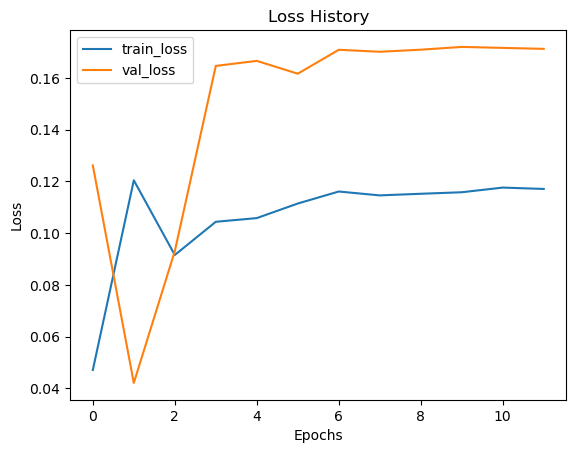

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

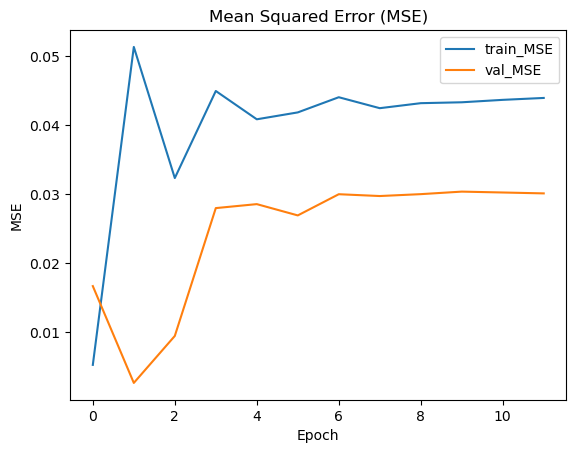

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

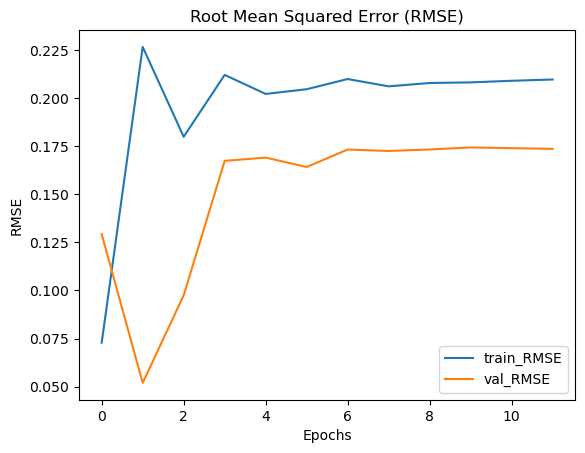

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

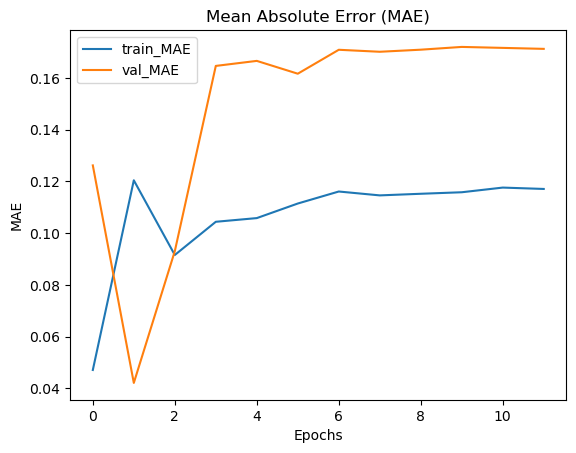

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

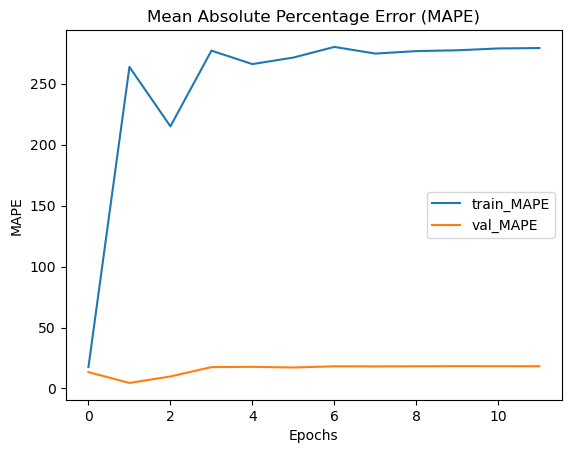

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 01:00:23.081564: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 3)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


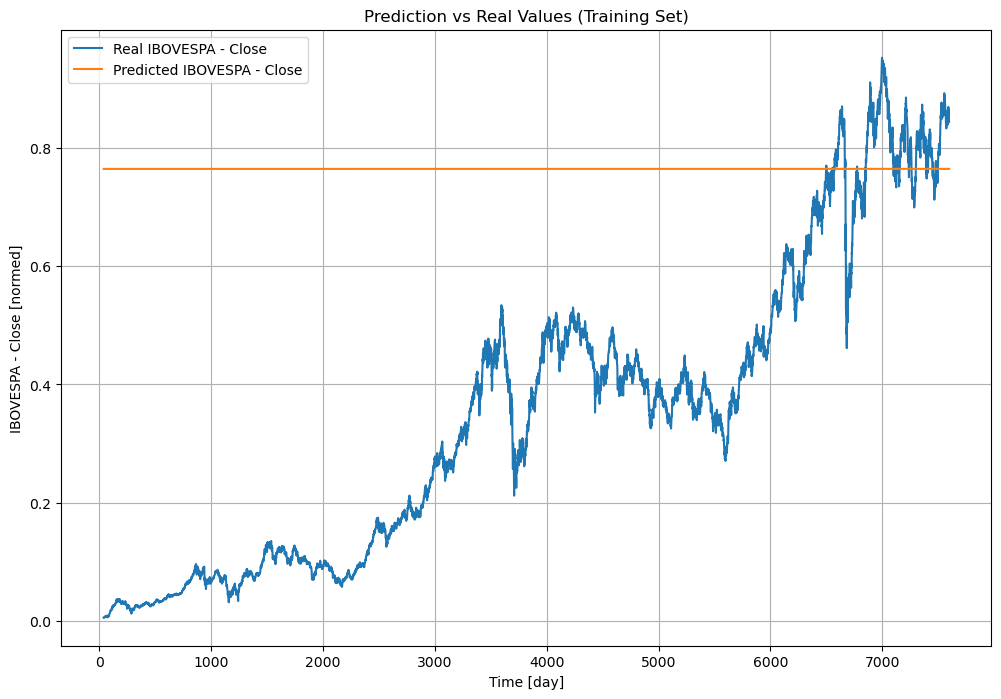

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 3)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


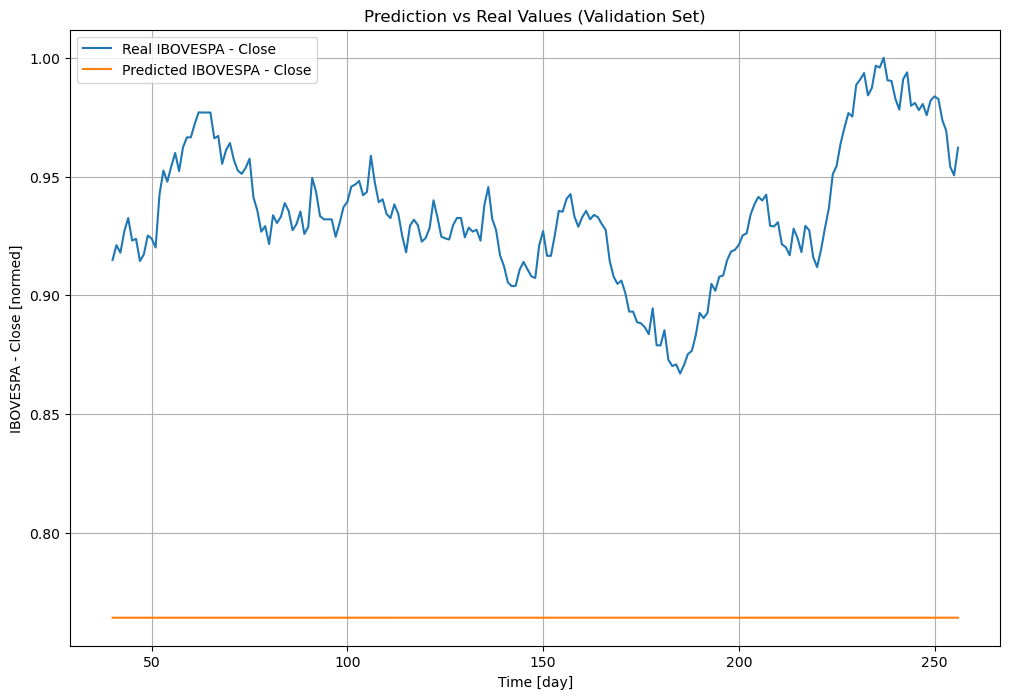

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 3)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


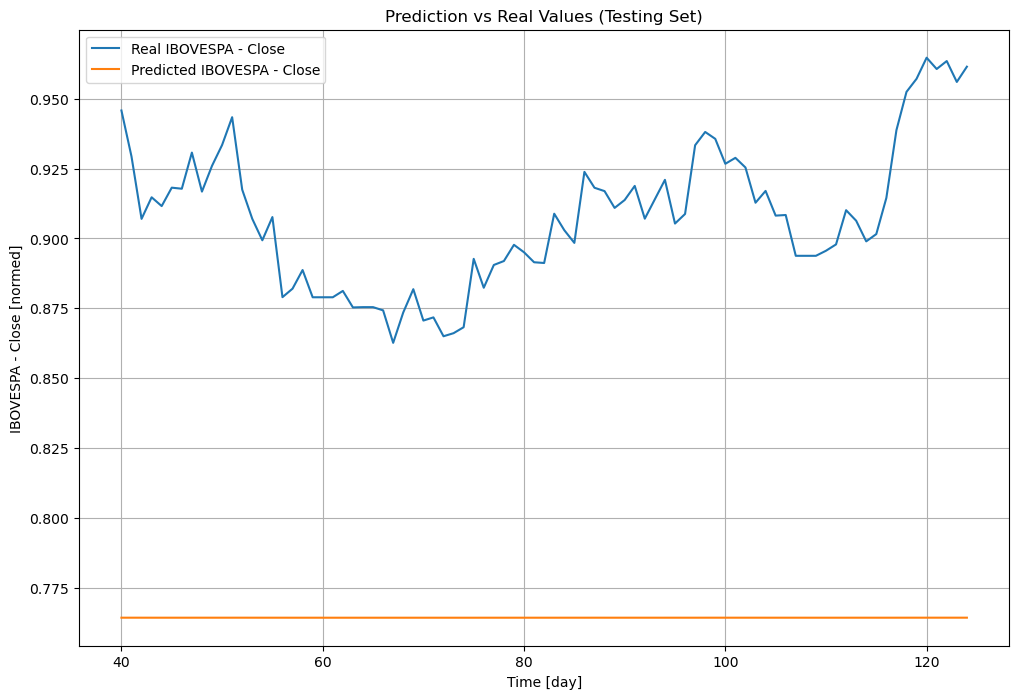

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

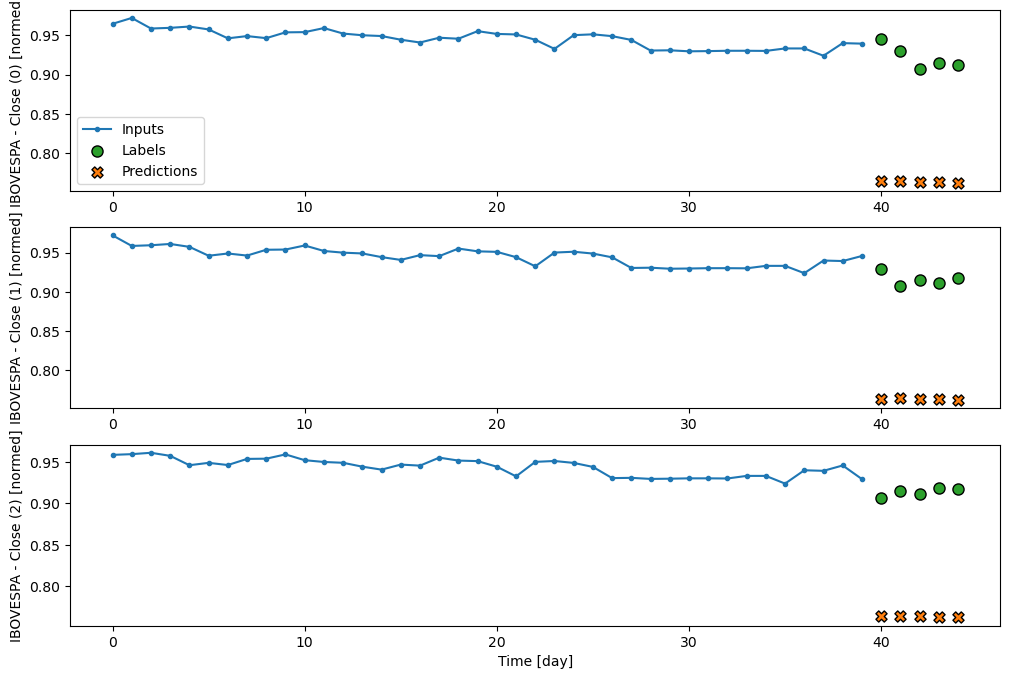

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:7s:159ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step


array([[[0.7643035 , 0.7643035 , 0.7643035 , ..., 0.7643035 ,
         0.7643035 , 0.7643035 ],
        [0.7645419 , 0.7645419 , 0.7645419 , ..., 0.7645419 ,
         0.7645419 , 0.7645419 ],
        [0.76365757, 0.76365757, 0.76365757, ..., 0.76365757,
         0.76365757, 0.76365757],
        [0.76339436, 0.76339436, 0.76339436, ..., 0.76339436,
         0.76339436, 0.76339436],
        [0.76230264, 0.76230264, 0.76230264, ..., 0.76230264,
         0.762303  , 0.762303  ]],

       [[0.76430464, 0.76430464, 0.76430464, ..., 0.76430464,
         0.76430464, 0.76430464],
        [0.7645422 , 0.7645422 , 0.7645422 , ..., 0.7645422 ,
         0.7645422 , 0.7645422 ],
        [0.76365745, 0.76365745, 0.76365745, ..., 0.76365745,
         0.76365745, 0.76365745],
        [0.7633949 , 0.7633949 , 0.7633949 , ..., 0.7633949 ,
         0.7633949 , 0.7633949 ],
        [0.7623023 , 0.7623023 , 0.7623023 , ..., 0.7623023 ,
         0.7623026 , 0.7623026 ]],

       [[0.7643029 , 0.7643029 , 0.7

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')